In [38]:
%pip install httpx
%pip install pandas
%pip install scipy
%pip install matplotlib
%pip install tables


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [39]:
import io
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.spatial import transform as scipy_transform


In [40]:
class SensorData:
    def __init__(self, timestamp, delta, quat, euler_x, euler_y, euler_z, euler_deg_x, euler_deg_y, euler_deg_z, 
                 angle_xy, angle_yz, angle_xz, ang_vel_x, ang_vel_y, ang_vel_z):
        self.timestamp = timestamp
        self.delta = delta
        self.quat = quat
        self.euler_x = euler_x
        self.euler_y = euler_y
        self.euler_z = euler_z
        self.euler_deg_x = euler_deg_x
        self.euler_deg_y = euler_deg_y
        self.euler_deg_z = euler_deg_z
        self.angle_xy = angle_xy
        self.angle_yz = angle_yz
        self.angle_xz = angle_xz
        self.ang_vel_x = ang_vel_x
        self.ang_vel_y = ang_vel_y
        self.ang_vel_z = ang_vel_z

    def __repr__(self):
        return f"SensorData({self.timestamp}, {self.delta}, {self.quat}, {self.euler_x}, {self.euler_y}, {self.euler_z}, {self.euler_deg_x}, {self.euler_deg_y}, {self.euler_deg_z}, {self.angle_xy}, {self.angle_yz}, {self.angle_xz}, {self.ang_vel_x}, {self.ang_vel_y}, {self.ang_vel_z})"



timestamp - just a timestamp  
delta - the difference between the current timestamp and the previous timestam  
quat_w, quat_x, quat_y, quat_z - quaternion values  
euler_x, euler_y, euler_z - euler angles in radians  
eulser_deg_x, euler_deg_y, euler_deg_z - euler angles in degrees  
angle_xy, angle_xz, angle_yz - angles between the axes and planes  
angle_vel_x, angle_vel_y, angle_vel_z - angular velocities in deg per second

In [41]:
def create_sensor_data(sensor_name, row):
    return SensorData(
        timestamp=row["timestamp"],
        delta=row["delta"],
        quat=row[f"{sensor_name}_quat"],
        euler_x=row[f"{sensor_name}_euler_x"],
        euler_y=row[f"{sensor_name}_euler_y"],
        euler_z=row[f"{sensor_name}_euler_z"],
        euler_deg_x=row[f"{sensor_name}_euler_deg_x"],
        euler_deg_y=row[f"{sensor_name}_euler_deg_y"],
        euler_deg_z=row[f"{sensor_name}_euler_deg_z"],
        angle_xy=row[f"{sensor_name}_angle_xy"],
        angle_yz=row[f"{sensor_name}_angle_yz"],
        angle_xz=row[f"{sensor_name}_angle_xz"],
        ang_vel_x=row[f"{sensor_name}_ang_vel_x"],
        ang_vel_y=row[f"{sensor_name}_ang_vel_y"],
        ang_vel_z=row[f"{sensor_name}_ang_vel_z"]
    )

In [42]:
df = pd.read_csv('data-frames.csv', sep=';')

thumb_datas = []
index_datas = []
middle_datas = []
ring_datas = []
pinky_datas = []
palm_datas = []
wrist_datas = []
shoulder_datas = []

for _, row in df.iterrows():
    thumb = create_sensor_data("thumb", row)
    thumb_datas.append(thumb)

    index = create_sensor_data("index", row)
    index_datas.append(index)

    middle = create_sensor_data("middle", row)
    middle_datas.append(middle)

    ring = create_sensor_data("ring", row)
    ring_datas.append(ring)

    pinky = create_sensor_data("pinky", row)
    pinky_datas.append(pinky)

    palm = create_sensor_data("palm", row)
    palm_datas.append(palm)

    wrist = create_sensor_data("wrist", row)
    wrist_datas.append(wrist)

    shoulder = create_sensor_data("shoulder", row)
    shoulder_datas.append(shoulder)

In [43]:
def draw_ang_plot(datas: list[SensorData], angleKey: str, sensor_name: str, y_label: str, add_title: str):
  acc_time = 0
  times = []
  angles = []

  for data in datas:
      acc_time += data.delta
      times.append(acc_time)
      angles.append(getattr(data, angleKey, 0))

  plt.figure(figsize=(20, 5))
  plt.plot(times, angles, label=f"{sensor_name} {angleKey}")
  plt.xlabel("Time (ms)")
  plt.ylabel(y_label)
  plt.title(f"{sensor_name} {angleKey} {add_title} over time")
  plt.legend()
  plt.grid(True)
  plt.show()

# angle between the axes and planes

## thumb plane angles

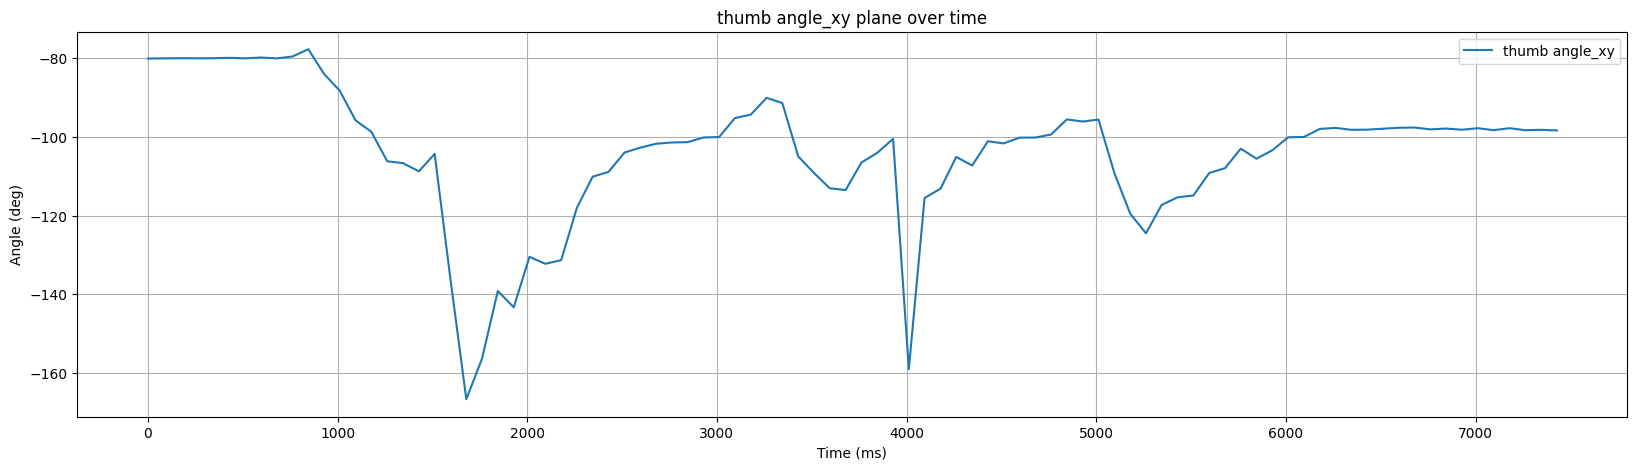

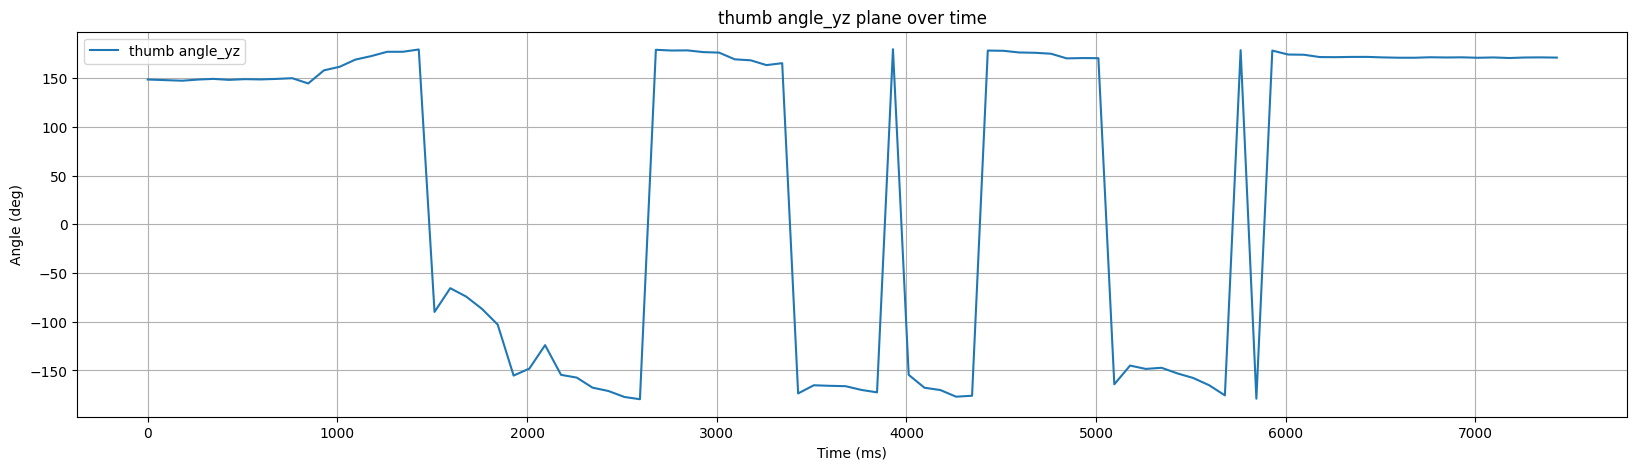

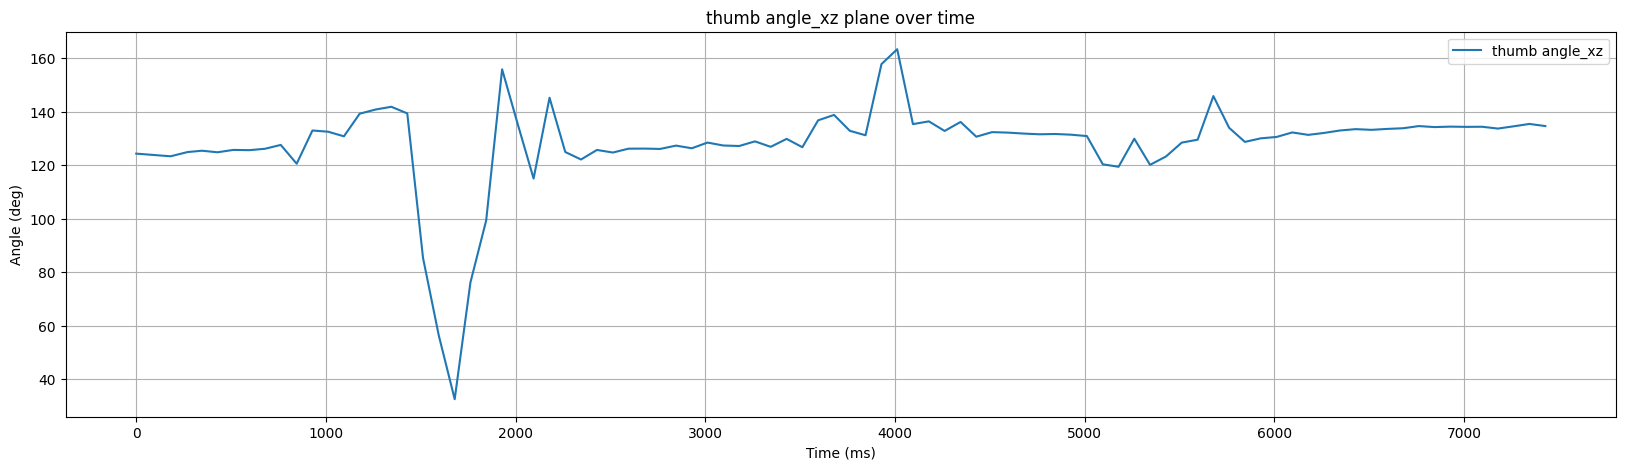

In [44]:
draw_ang_plot(thumb_datas, "angle_xy", "thumb", "Angle (deg)", "plane")
draw_ang_plot(thumb_datas, "angle_yz", "thumb", "Angle (deg)", "plane")
draw_ang_plot(thumb_datas, "angle_xz", "thumb", "Angle (deg)", "plane")

## index plane angles

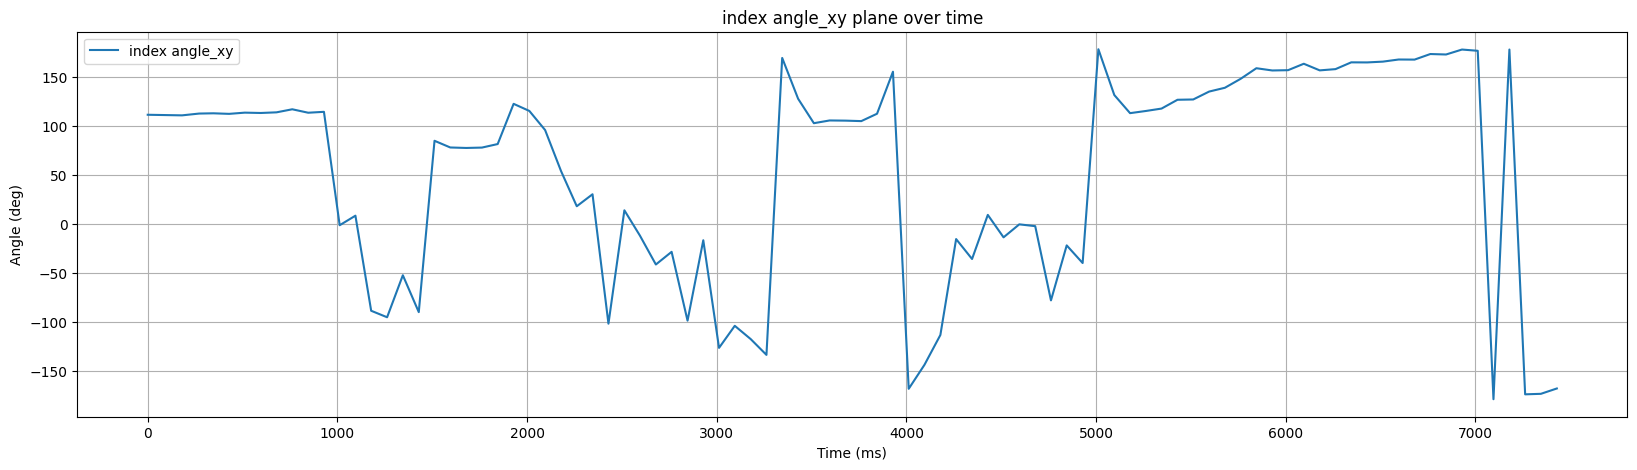

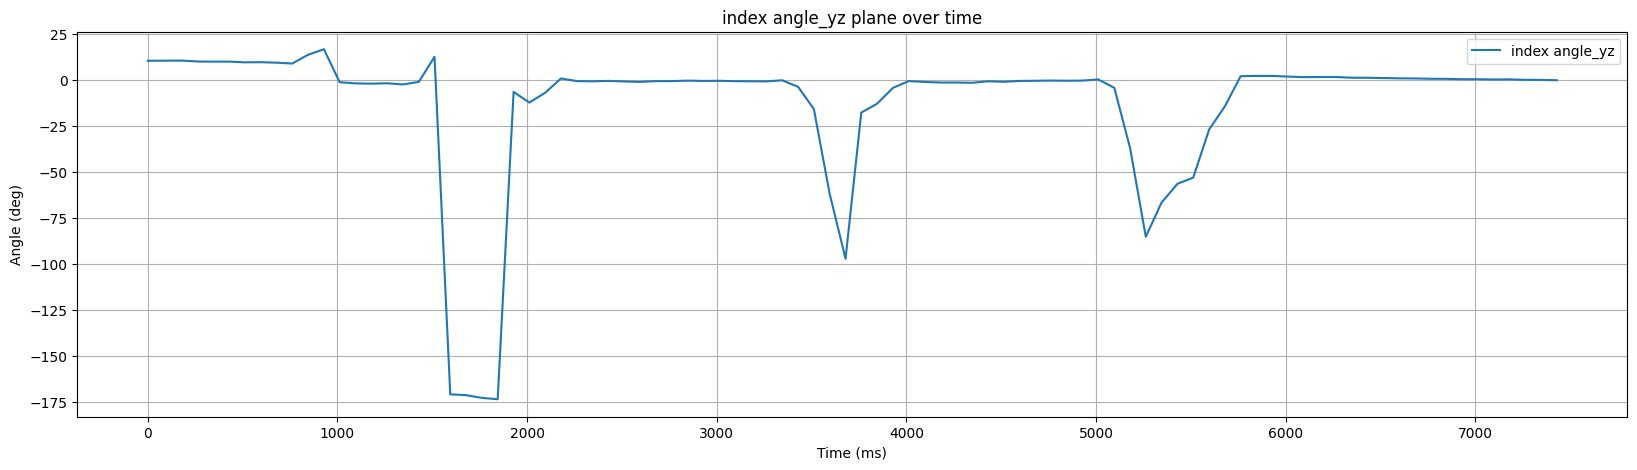

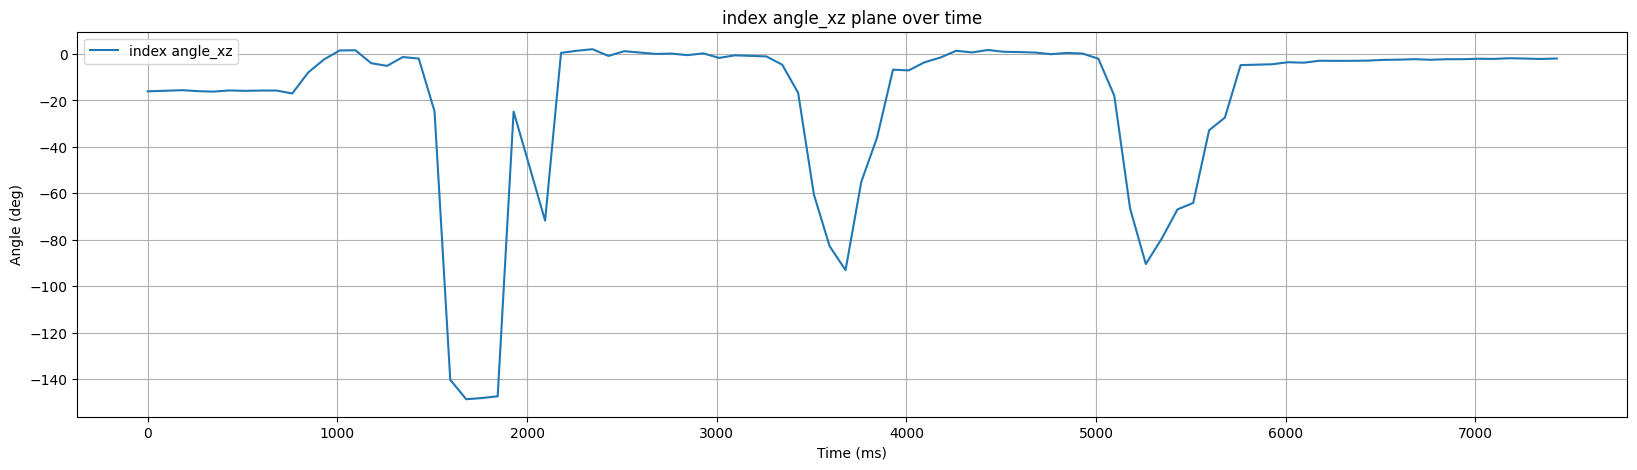

In [45]:
draw_ang_plot(index_datas, "angle_xy", "index", "Angle (deg)", "plane")
draw_ang_plot(index_datas, "angle_yz", "index", "Angle (deg)", "plane")
draw_ang_plot(index_datas, "angle_xz", "index", "Angle (deg)", "plane")

## middle plane angles

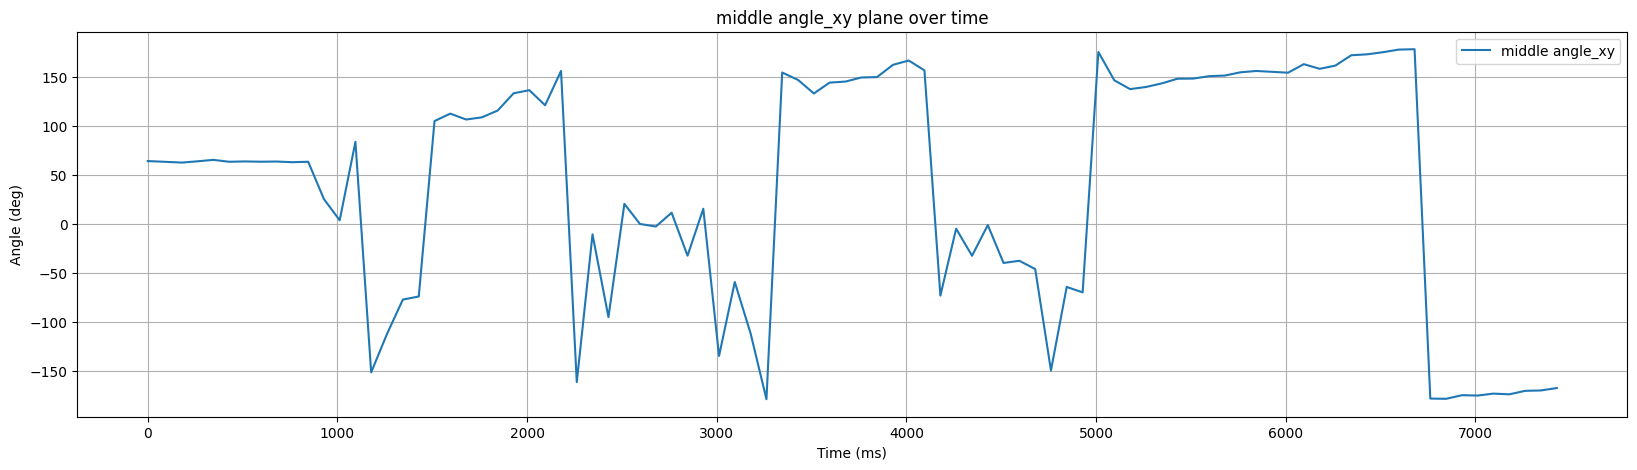

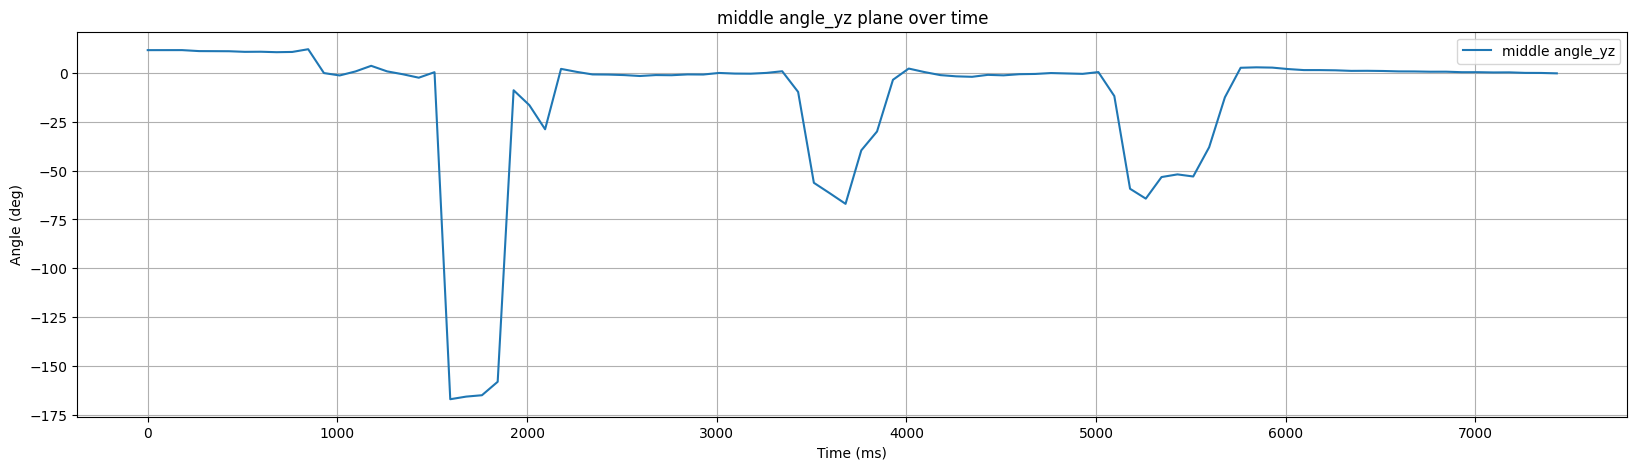

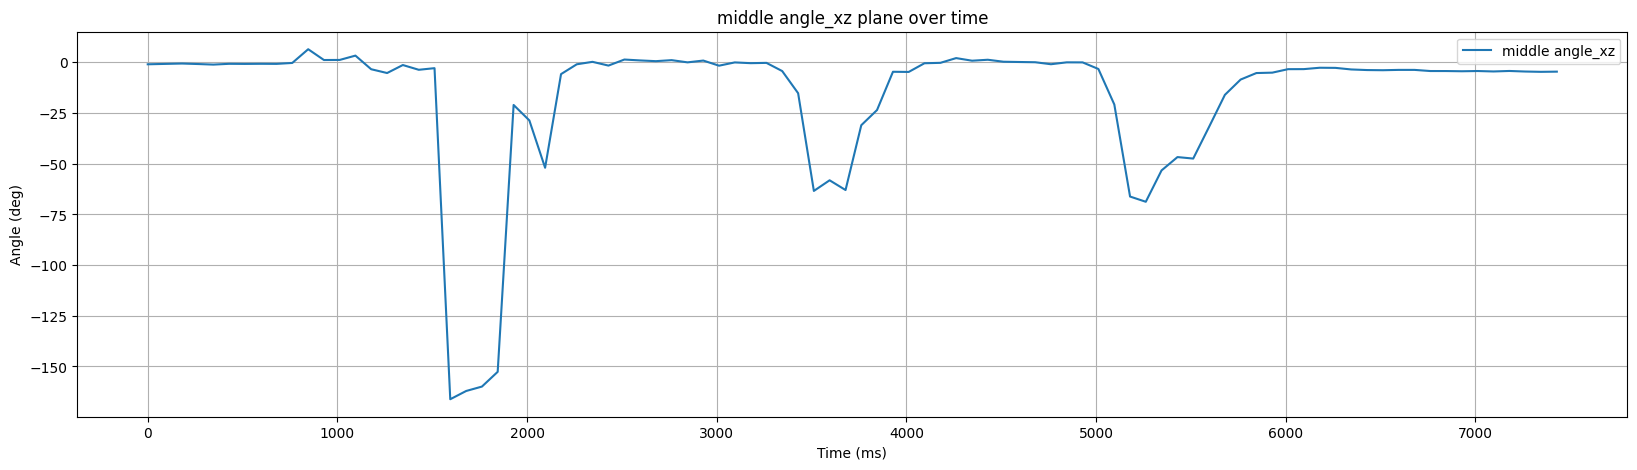

In [46]:
draw_ang_plot(middle_datas, "angle_xy", "middle", "Angle (deg)", "plane")
draw_ang_plot(middle_datas, "angle_yz", "middle", "Angle (deg)", "plane")
draw_ang_plot(middle_datas, "angle_xz", "middle", "Angle (deg)", "plane")

## ring plane angles

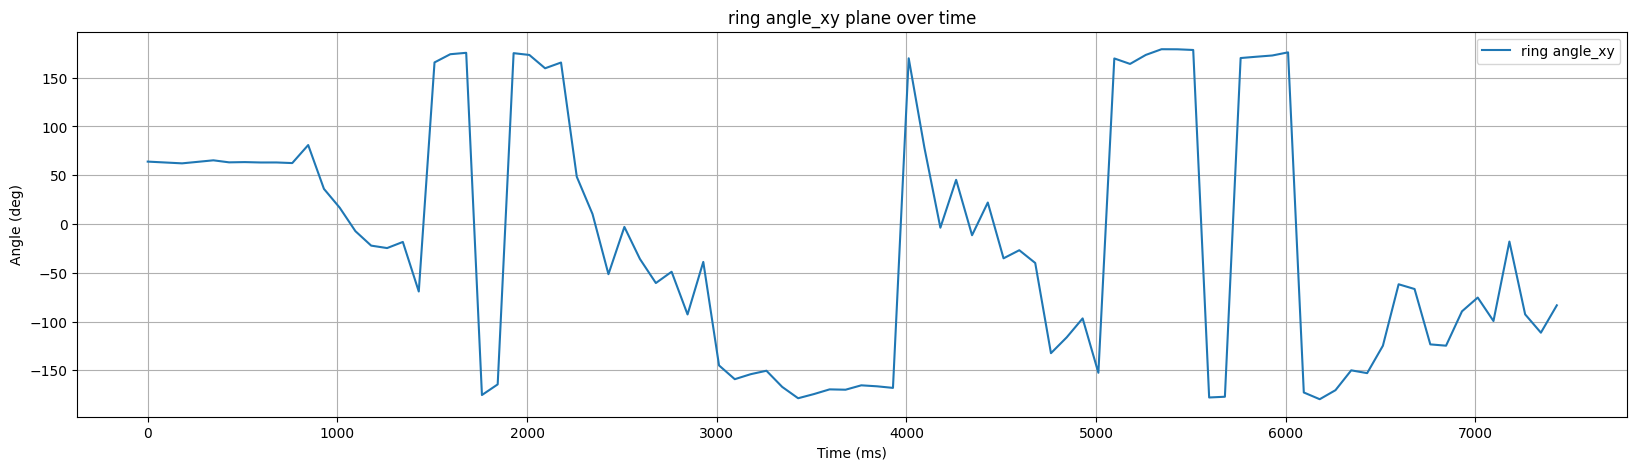

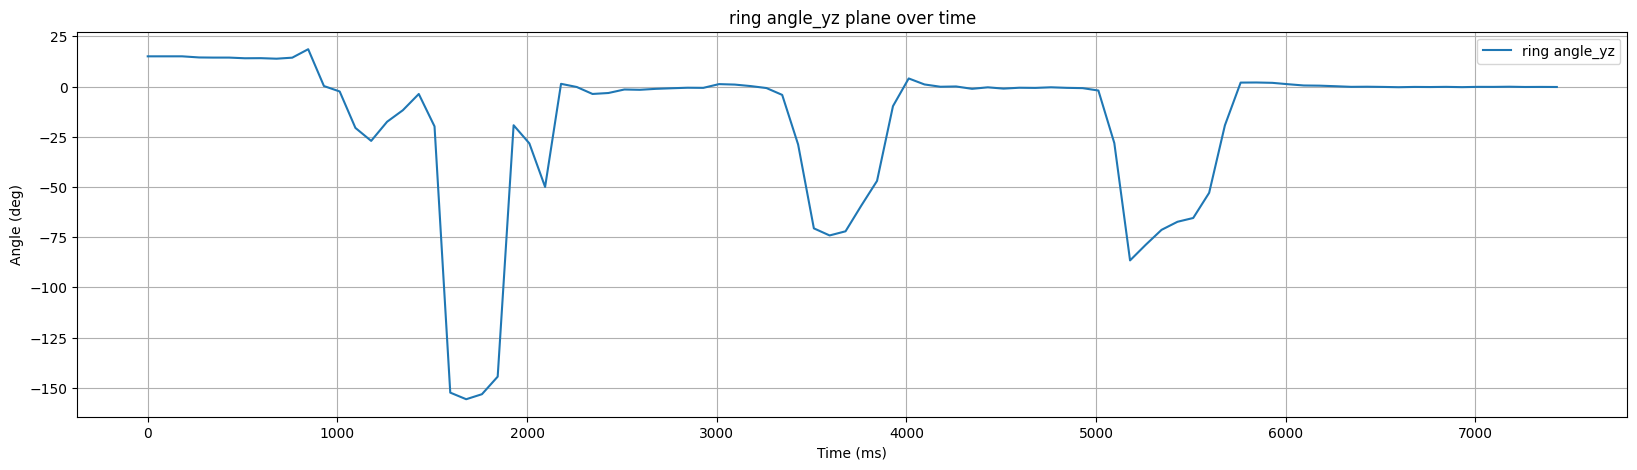

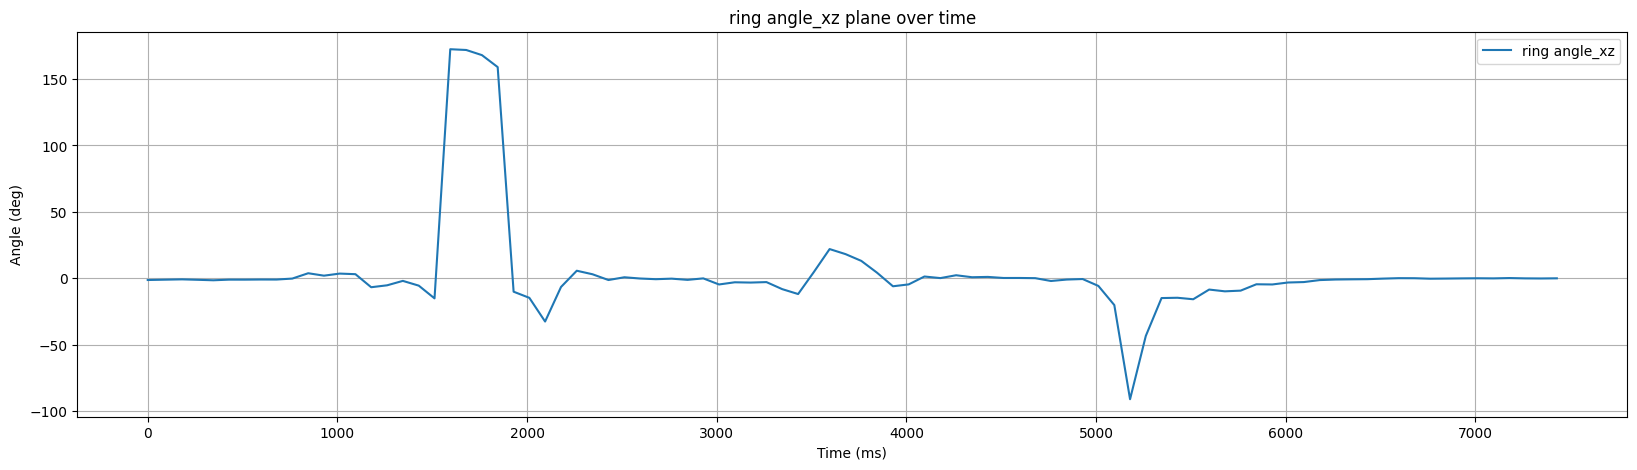

In [47]:
draw_ang_plot(ring_datas, "angle_xy", "ring", "Angle (deg)", "plane")
draw_ang_plot(ring_datas, "angle_yz", "ring", "Angle (deg)", "plane")
draw_ang_plot(ring_datas, "angle_xz", "ring", "Angle (deg)", "plane")

## pinky plane angles

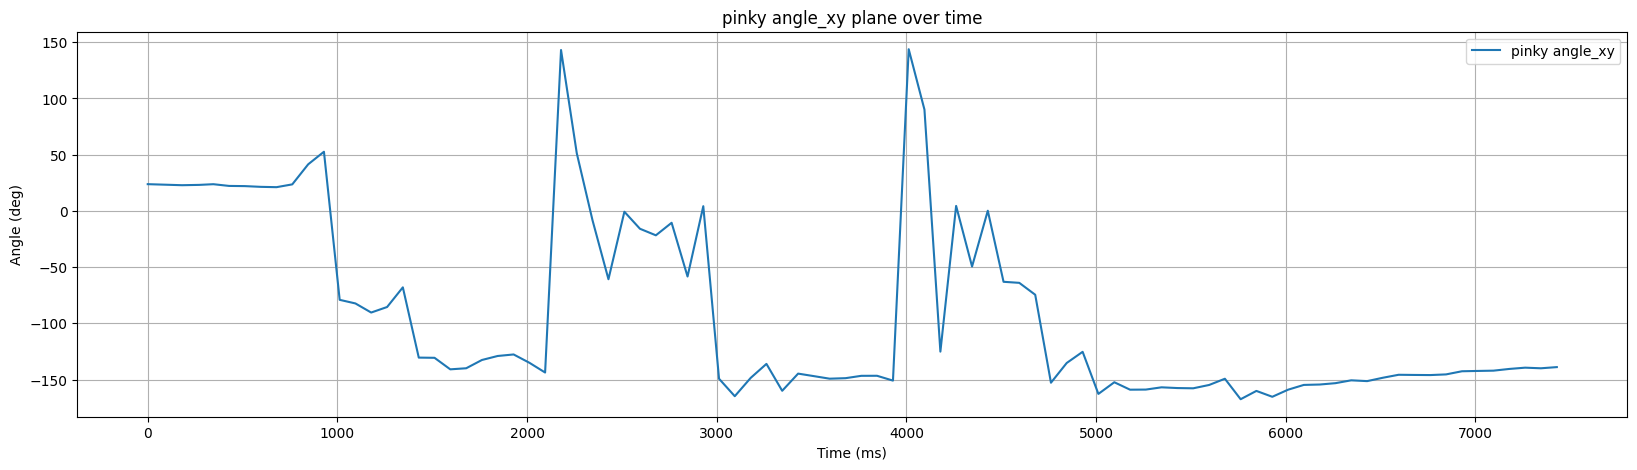

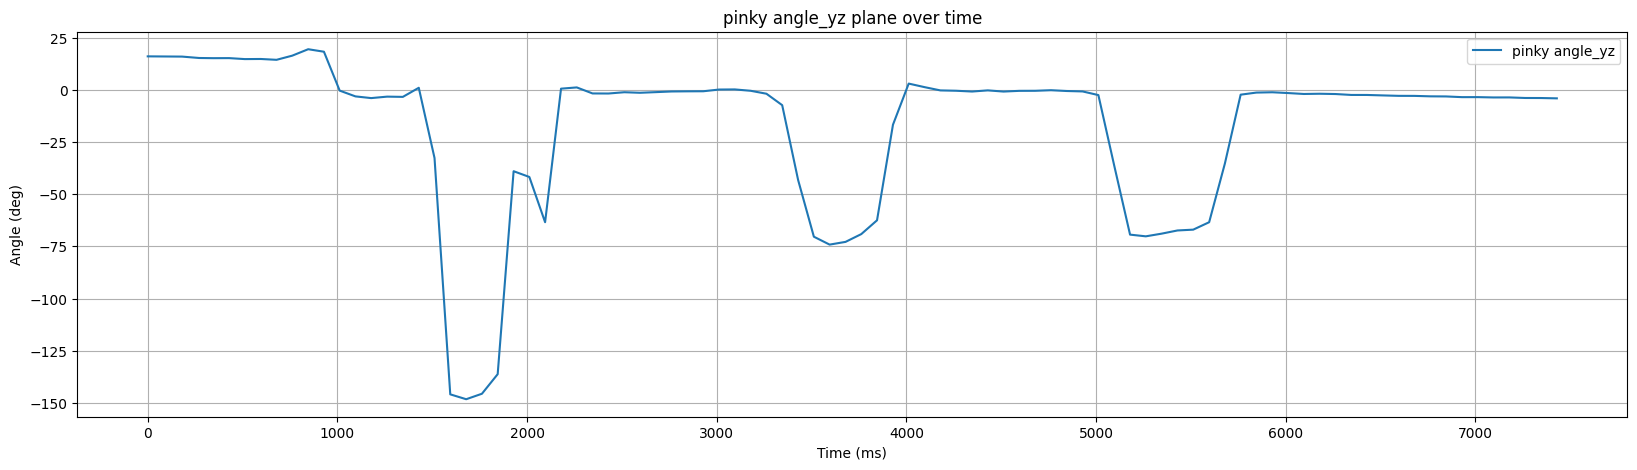

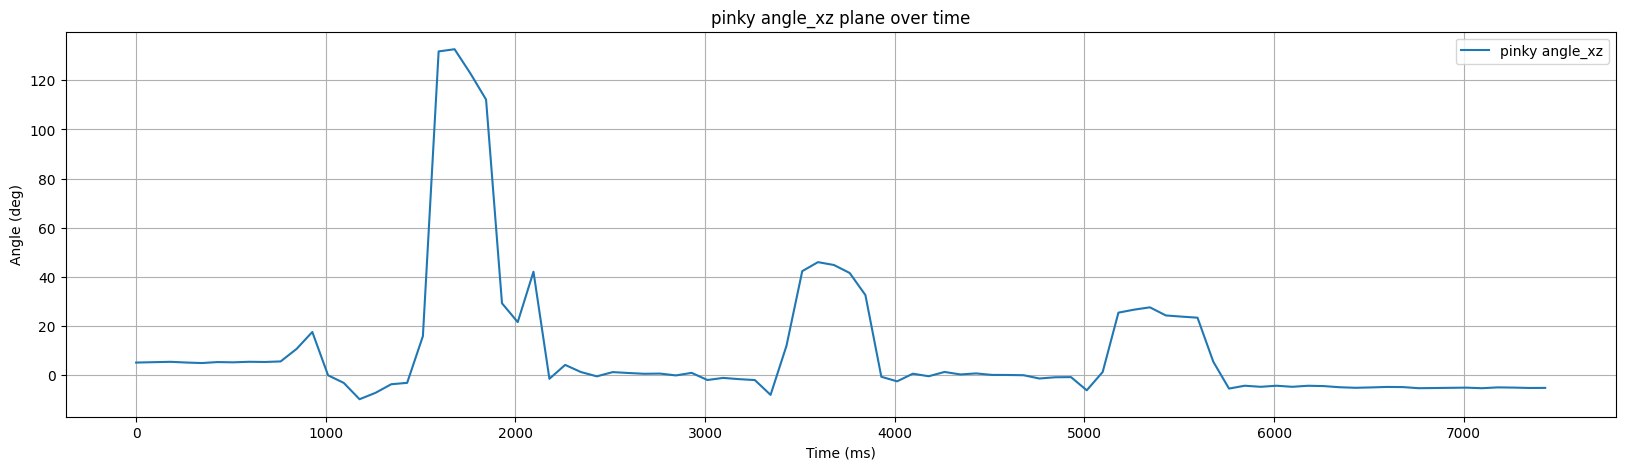

In [48]:
draw_ang_plot(pinky_datas, "angle_xy", "pinky", "Angle (deg)", "plane")
draw_ang_plot(pinky_datas, "angle_yz", "pinky", "Angle (deg)", "plane")
draw_ang_plot(pinky_datas, "angle_xz", "pinky", "Angle (deg)", "plane")

## palm plane angles

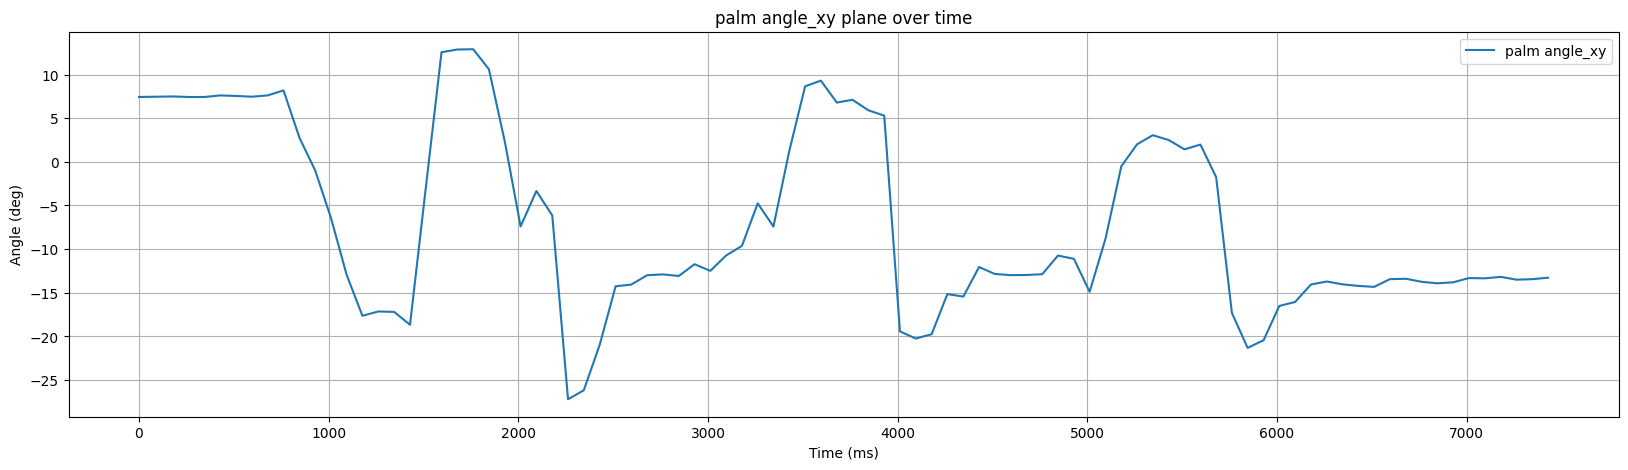

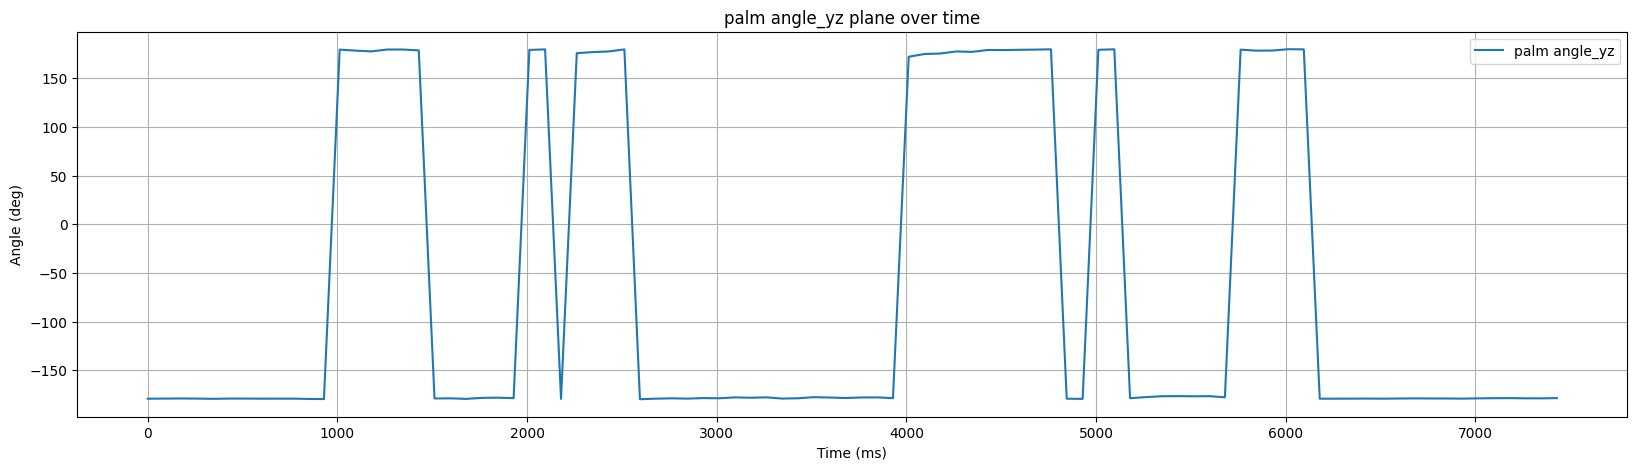

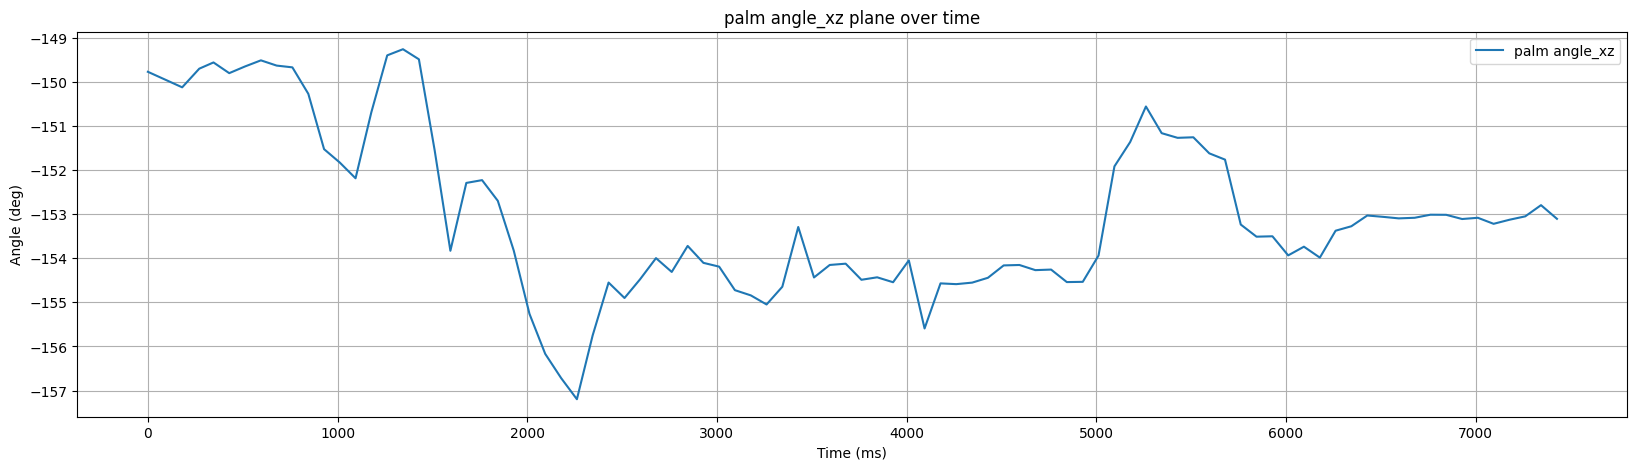

In [49]:
draw_ang_plot(palm_datas, "angle_xy", "palm", "Angle (deg)", "plane")
draw_ang_plot(palm_datas, "angle_yz", "palm", "Angle (deg)", "plane")
draw_ang_plot(palm_datas, "angle_xz", "palm", "Angle (deg)", "plane")

## wrist plane angles

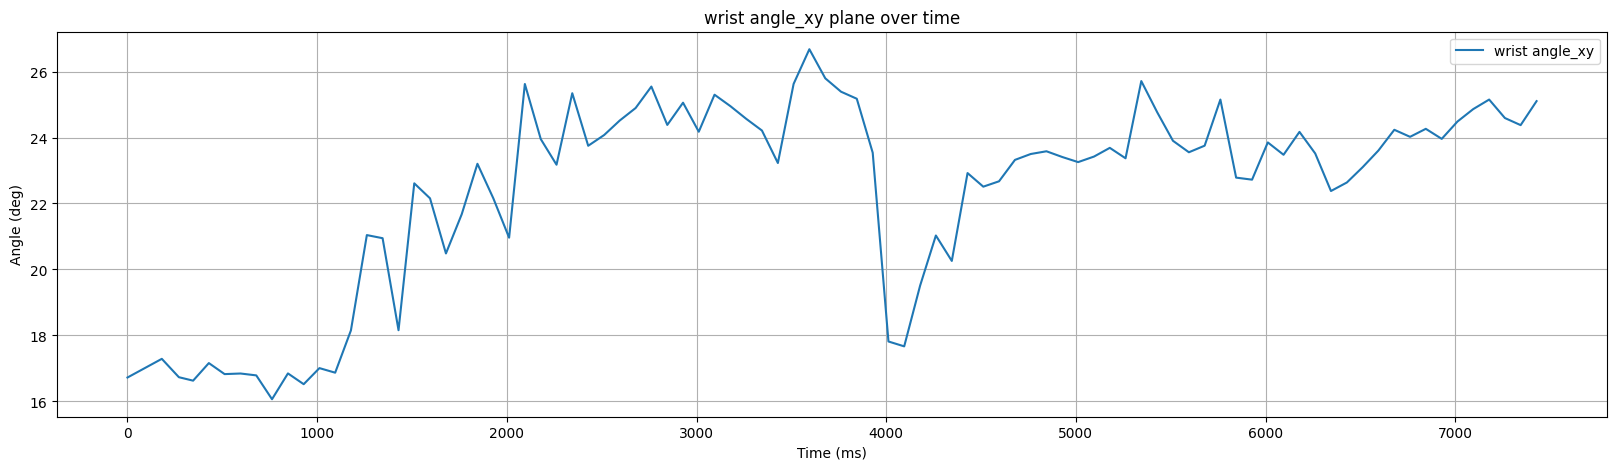

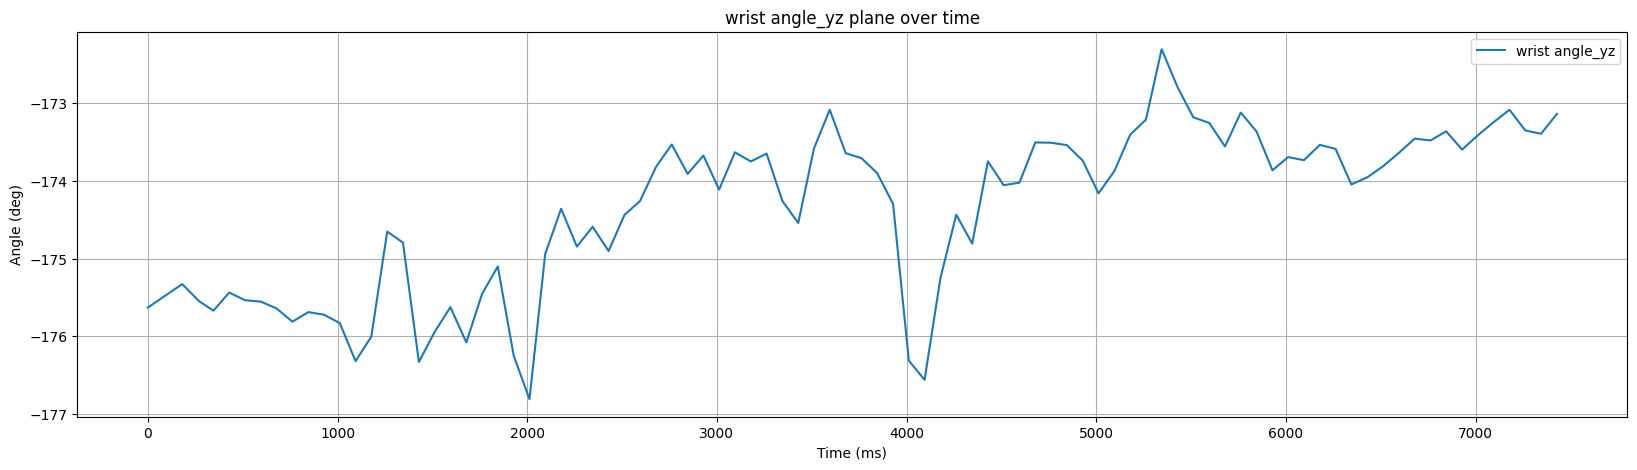

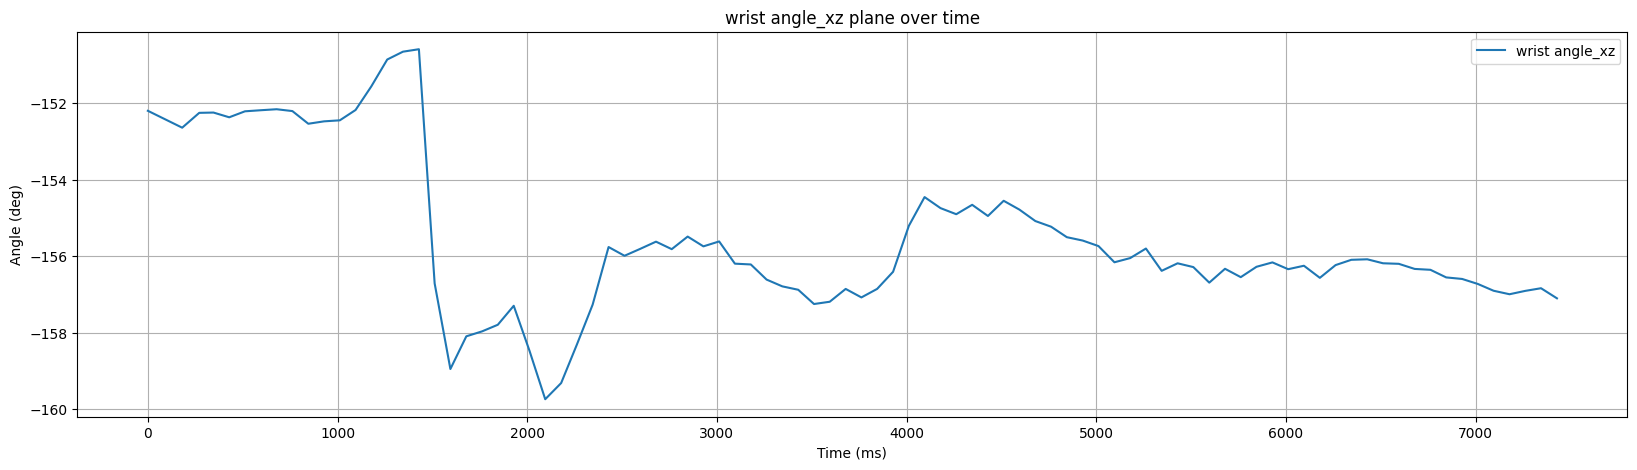

In [50]:
draw_ang_plot(wrist_datas, "angle_xy", "wrist", "Angle (deg)", "plane")
draw_ang_plot(wrist_datas, "angle_yz", "wrist", "Angle (deg)", "plane")
draw_ang_plot(wrist_datas, "angle_xz", "wrist", "Angle (deg)", "plane")

## shoulder plane angles

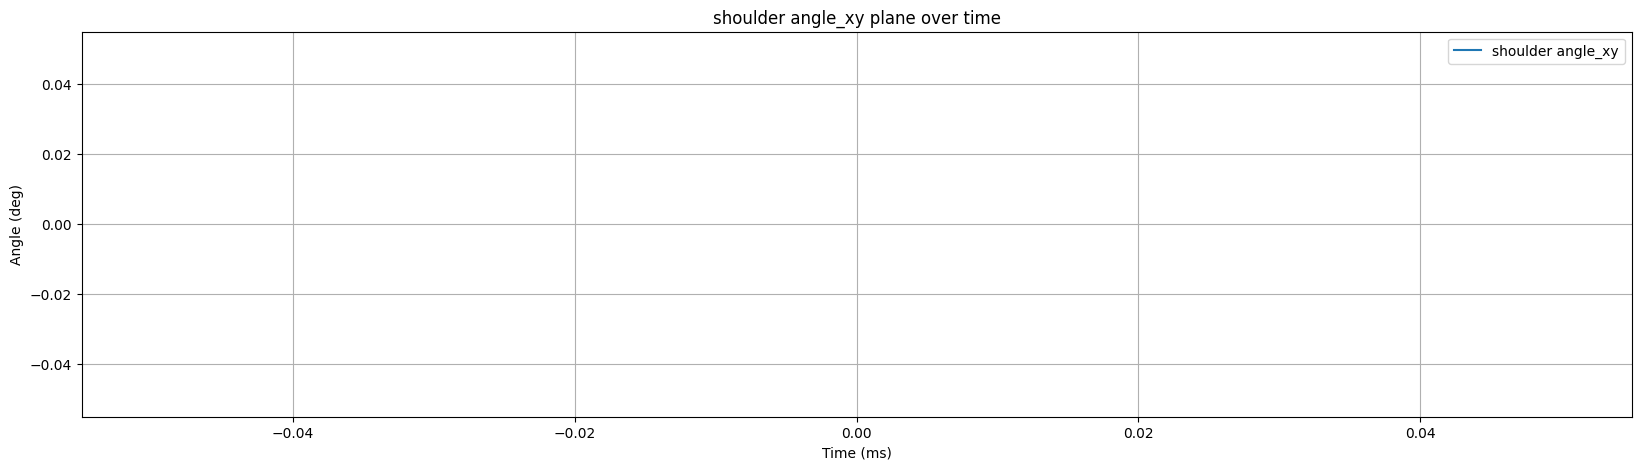

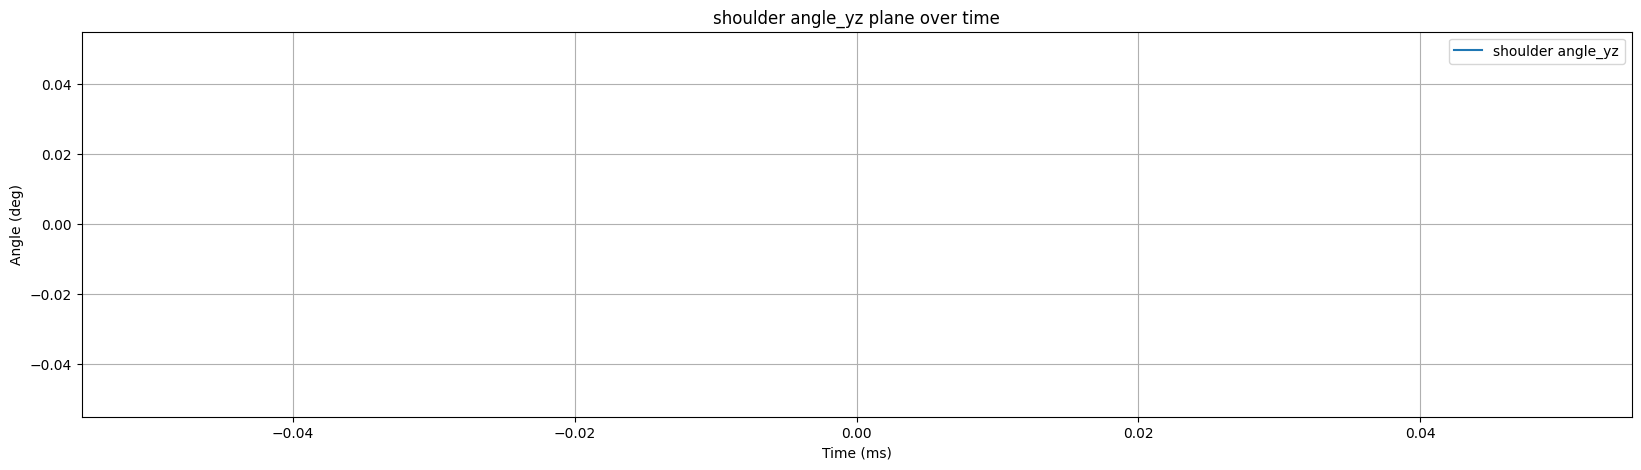

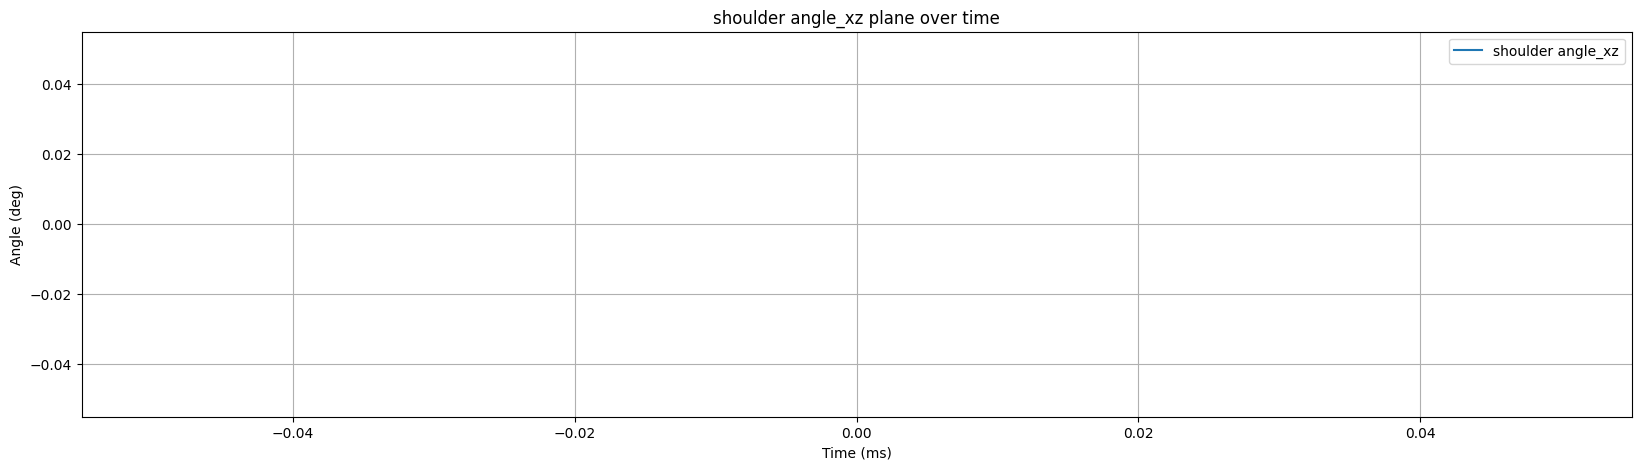

In [51]:
draw_ang_plot(shoulder_datas, "angle_xy", "shoulder", "Angle (deg)", "plane")
draw_ang_plot(shoulder_datas, "angle_yz", "shoulder", "Angle (deg)", "plane")
draw_ang_plot(shoulder_datas, "angle_xz", "shoulder", "Angle (deg)", "plane")

## thumb angular velocities

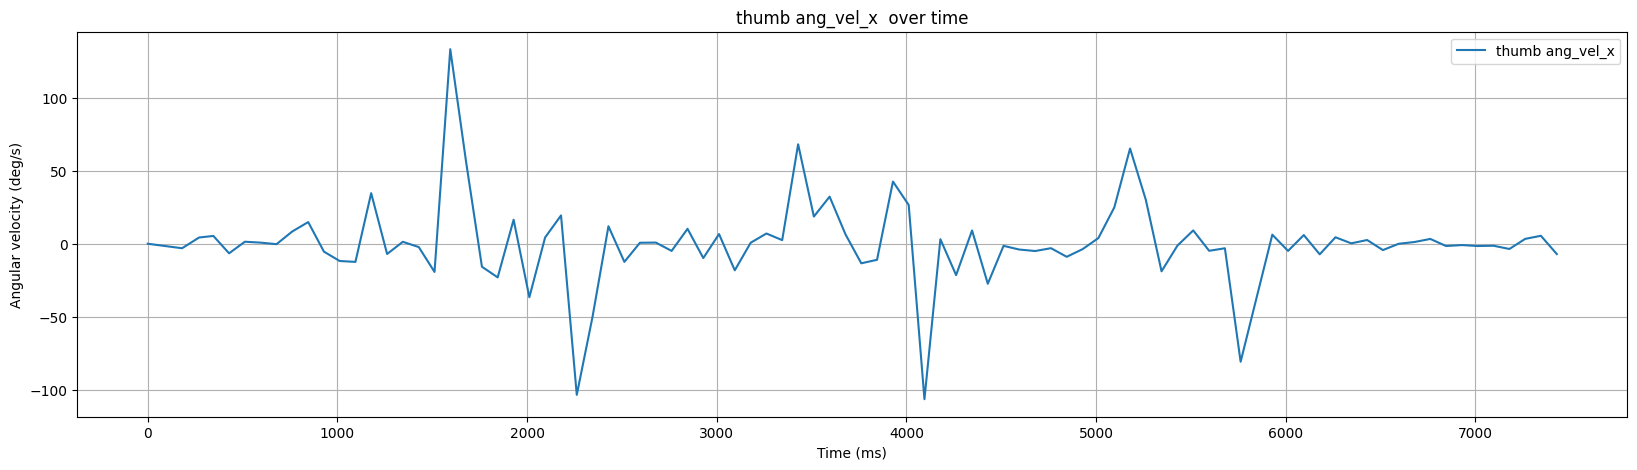

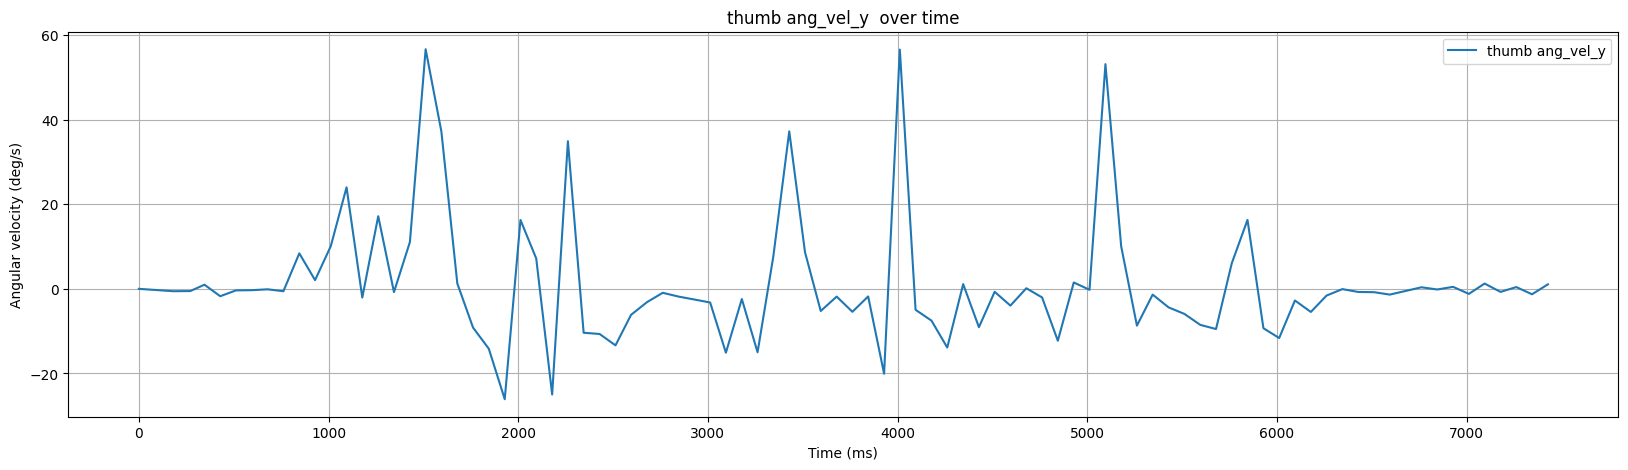

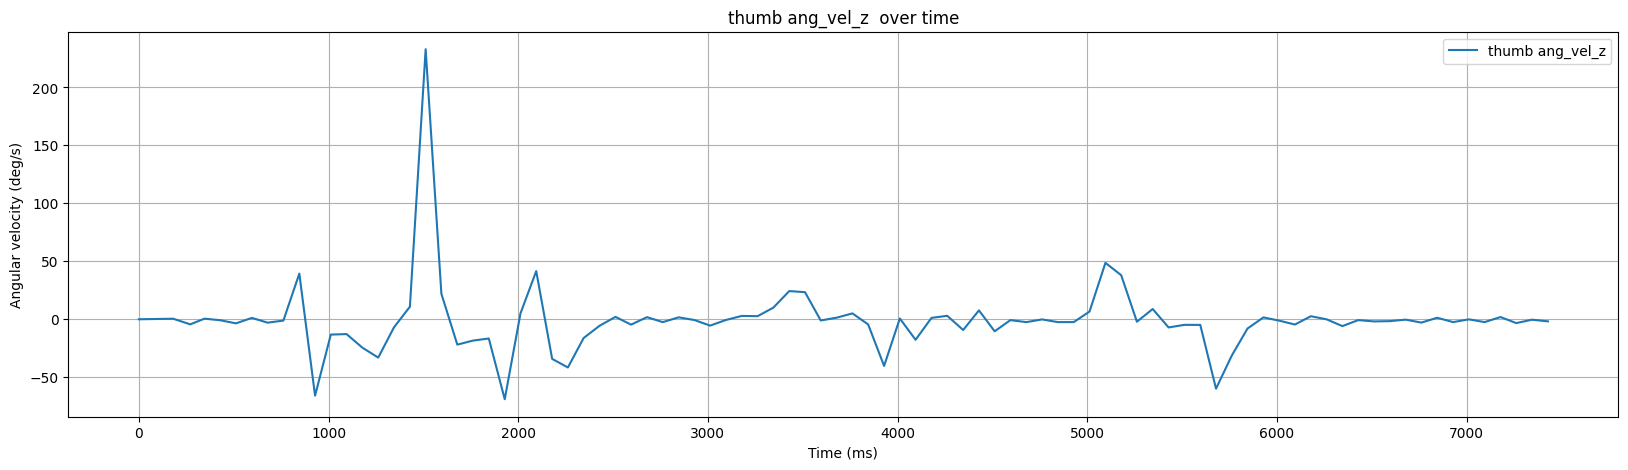

In [52]:
draw_ang_plot(thumb_datas, "ang_vel_x", "thumb", "Angular velocity (deg/s)", "")
draw_ang_plot(thumb_datas, "ang_vel_y", "thumb", "Angular velocity (deg/s)", "")
draw_ang_plot(thumb_datas, "ang_vel_z", "thumb", "Angular velocity (deg/s)", "")

## index angular velocities

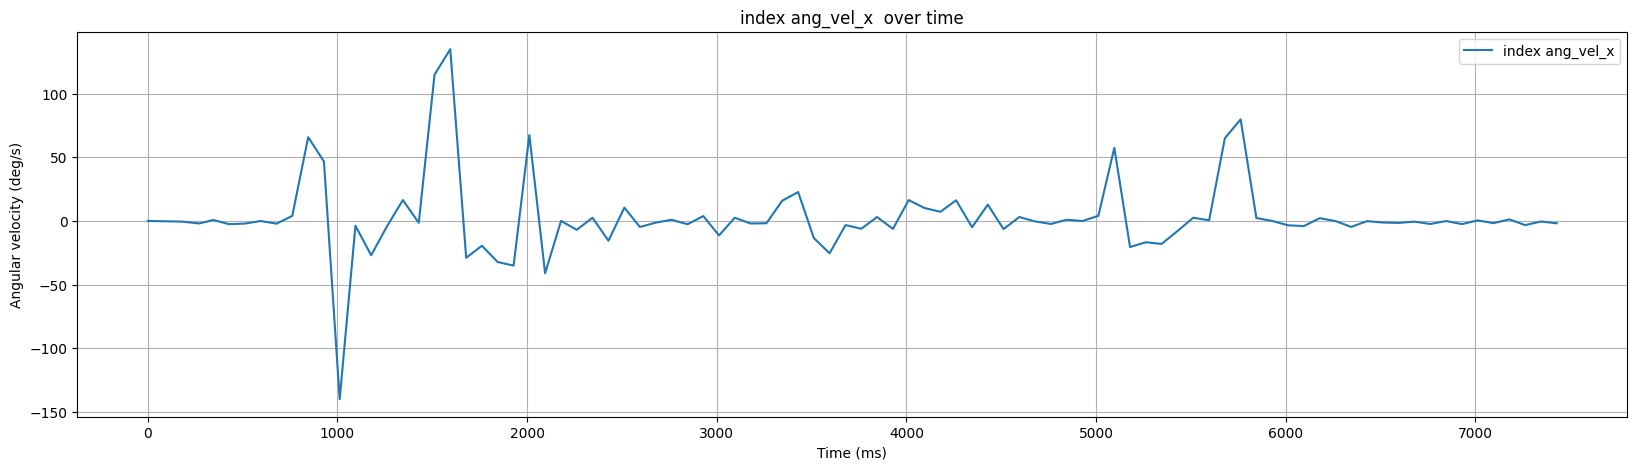

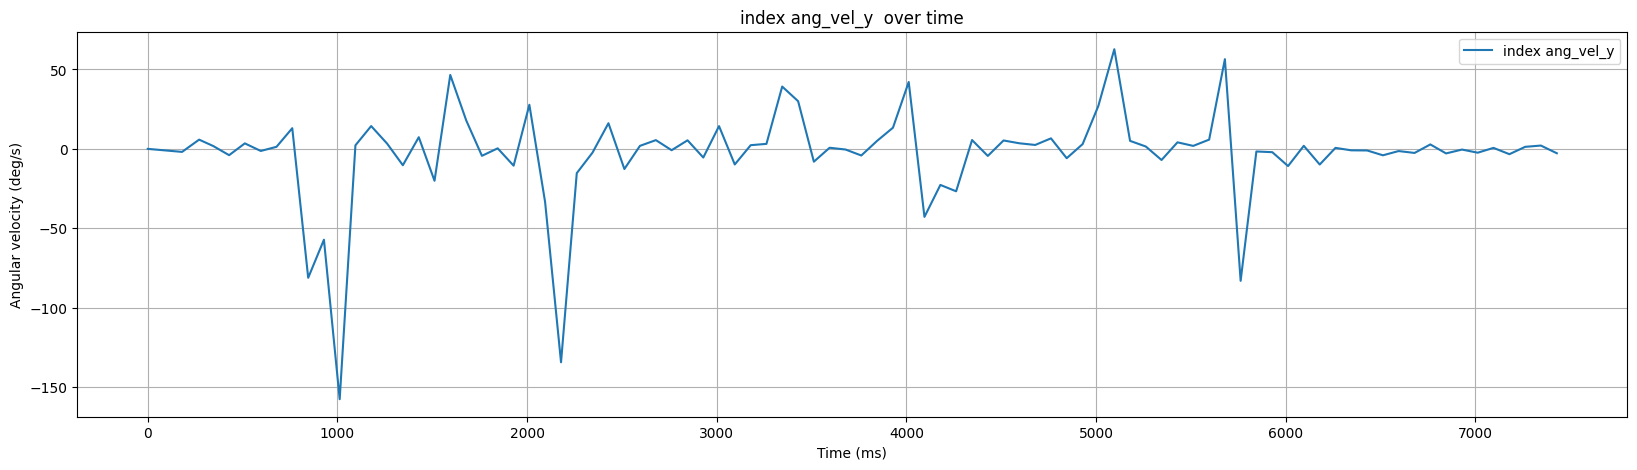

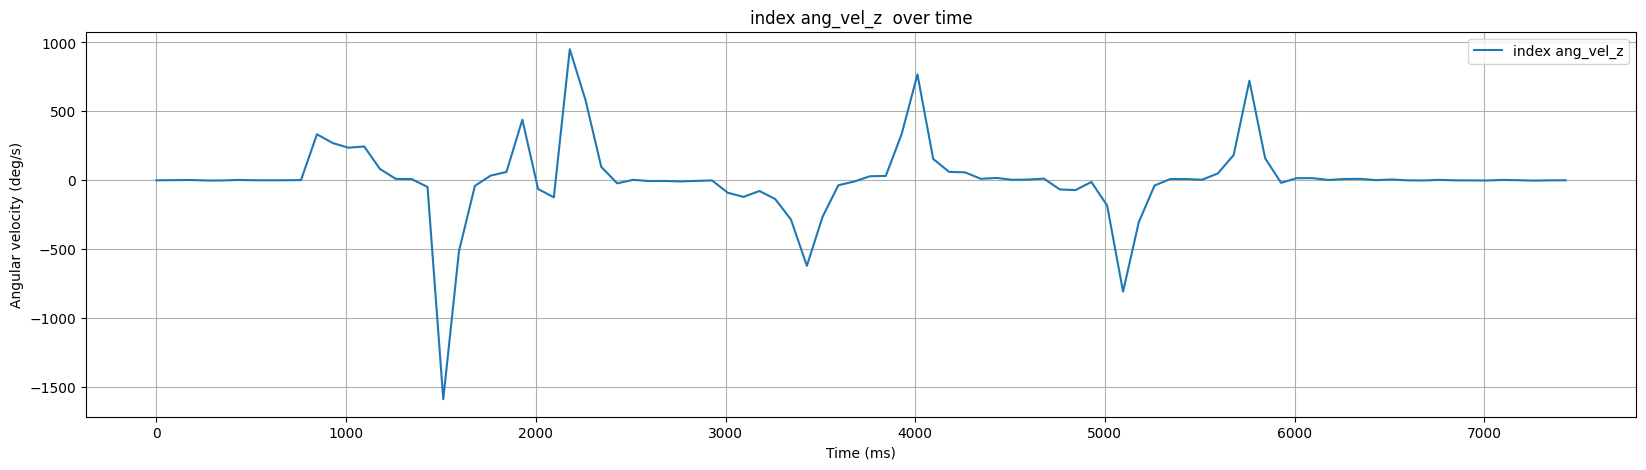

In [53]:
draw_ang_plot(index_datas, "ang_vel_x", "index", "Angular velocity (deg/s)", "")
draw_ang_plot(index_datas, "ang_vel_y", "index", "Angular velocity (deg/s)", "")
draw_ang_plot(index_datas, "ang_vel_z", "index", "Angular velocity (deg/s)", "")

## middle angular velocities

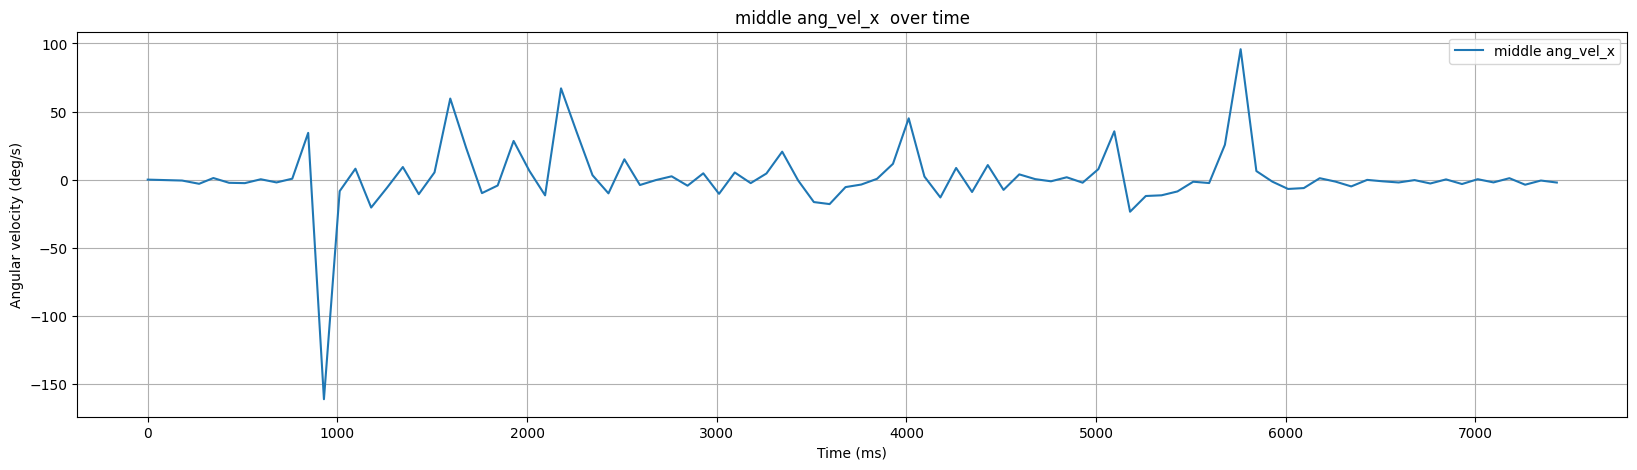

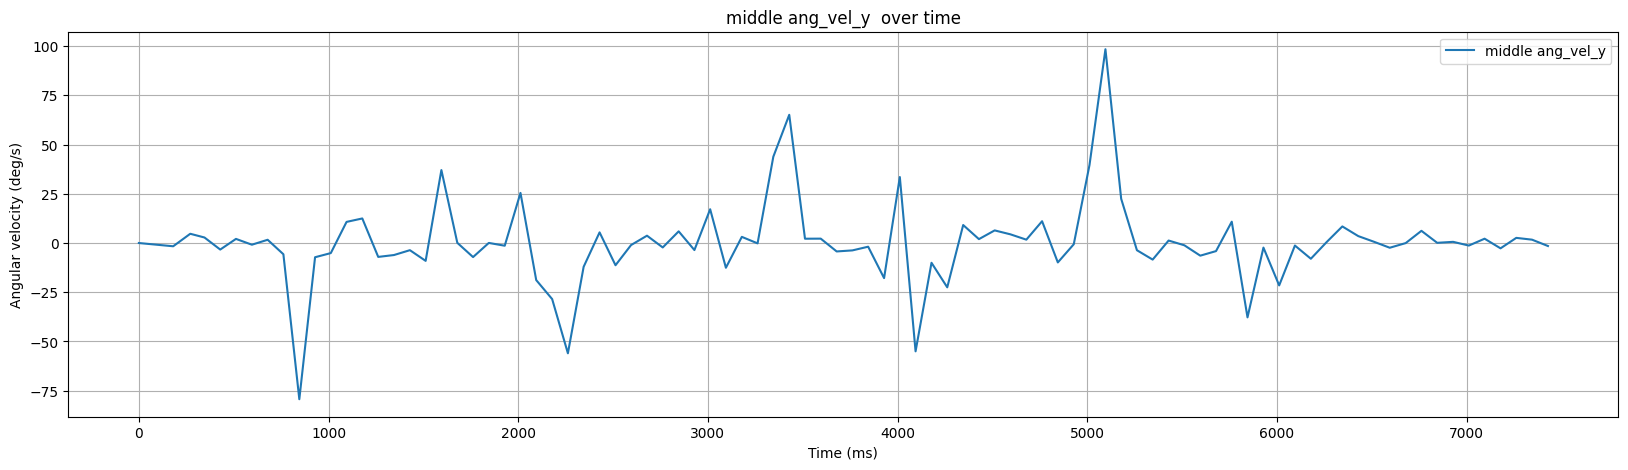

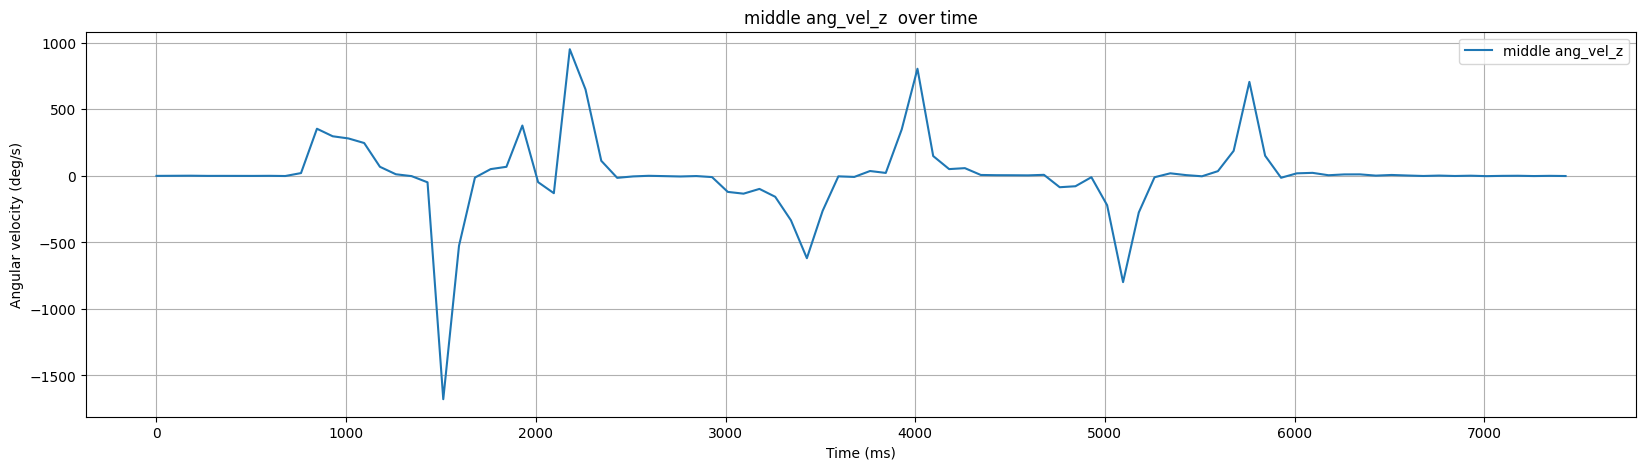

In [54]:
draw_ang_plot(middle_datas, "ang_vel_x", "middle", "Angular velocity (deg/s)", "")
draw_ang_plot(middle_datas, "ang_vel_y", "middle", "Angular velocity (deg/s)", "")
draw_ang_plot(middle_datas, "ang_vel_z", "middle", "Angular velocity (deg/s)", "")

## ring angular velocities

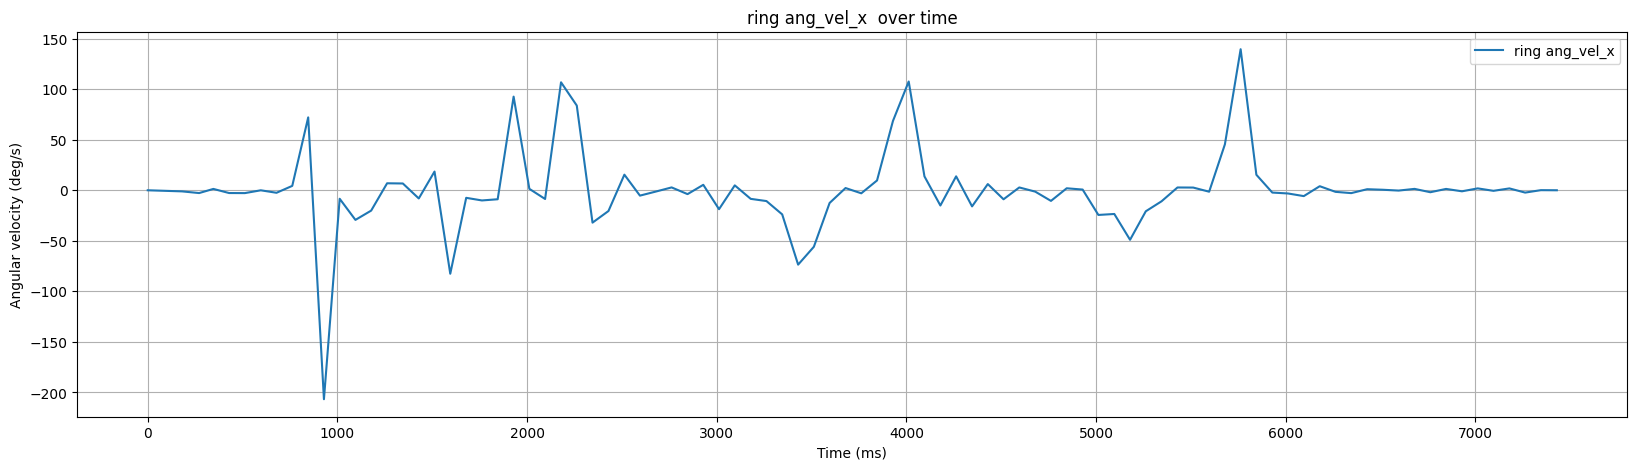

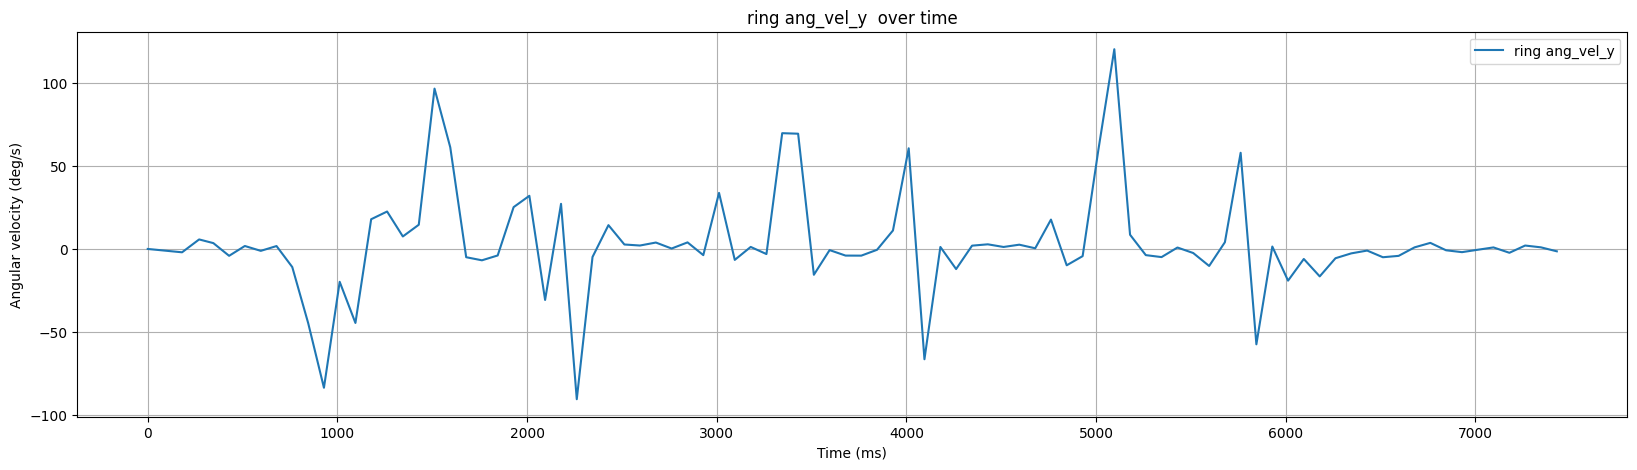

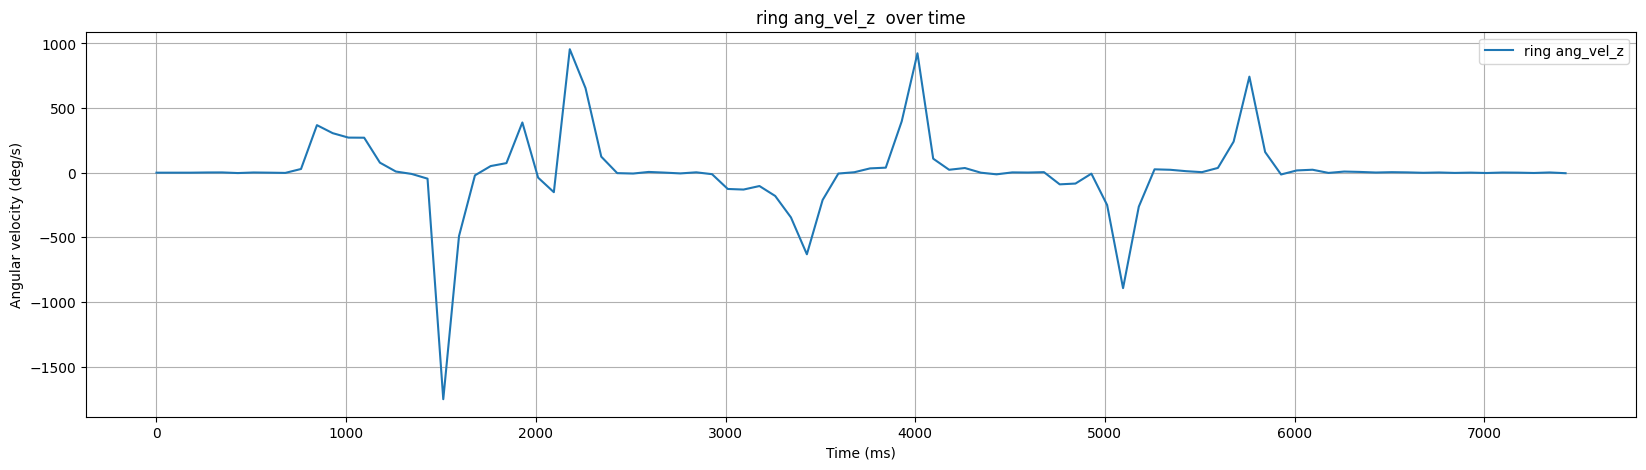

In [55]:
draw_ang_plot(ring_datas, "ang_vel_x", "ring", "Angular velocity (deg/s)", "")
draw_ang_plot(ring_datas, "ang_vel_y", "ring", "Angular velocity (deg/s)", "")
draw_ang_plot(ring_datas, "ang_vel_z", "ring", "Angular velocity (deg/s)", "")

## pinky angular velocities

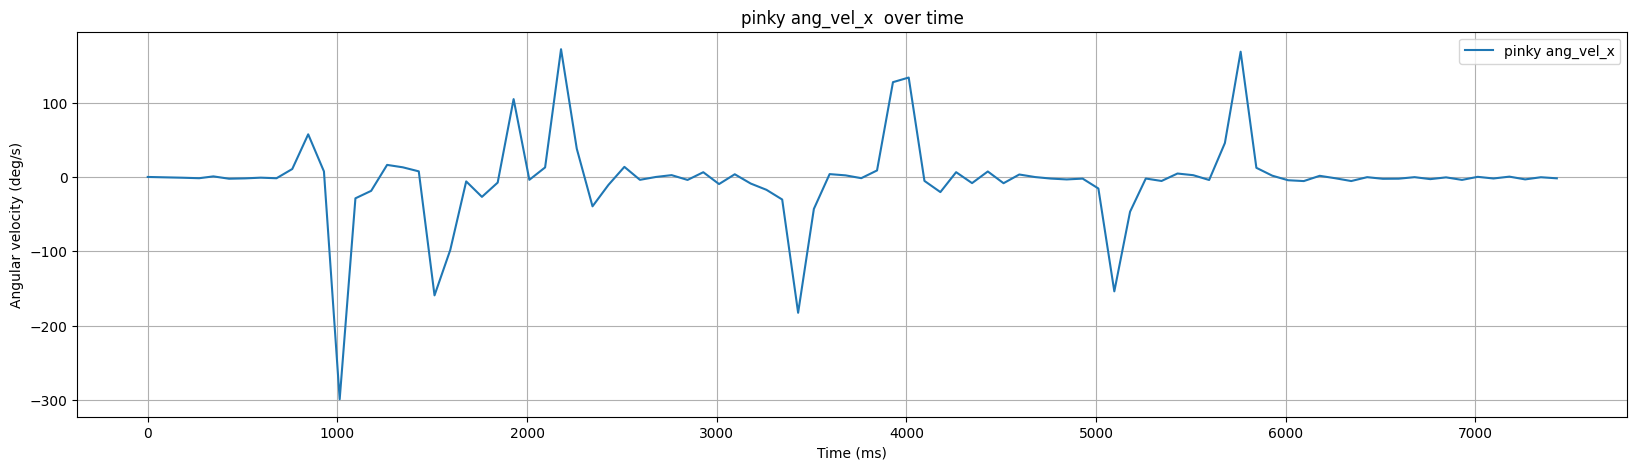

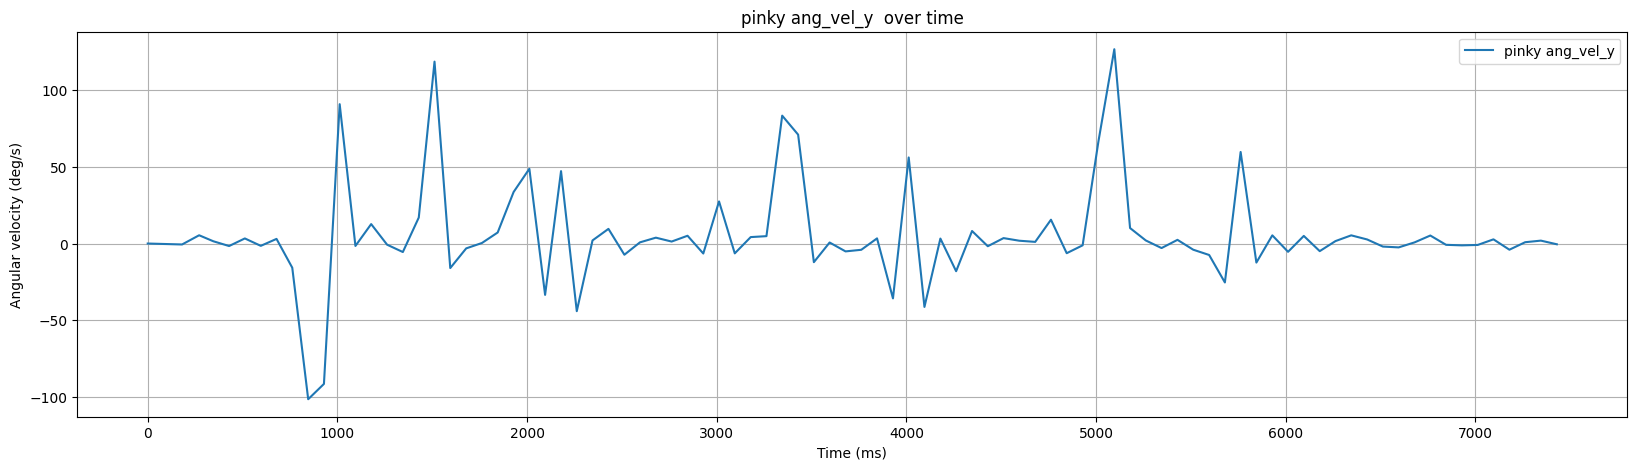

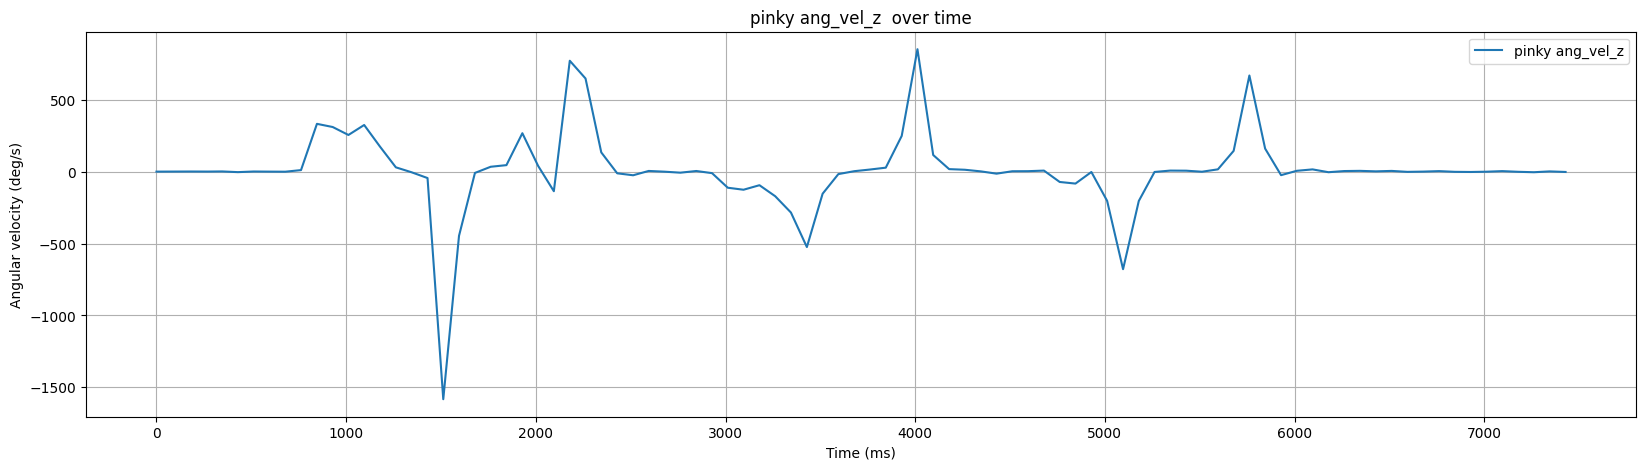

In [56]:
draw_ang_plot(pinky_datas, "ang_vel_x", "pinky", "Angular velocity (deg/s)", "")
draw_ang_plot(pinky_datas, "ang_vel_y", "pinky", "Angular velocity (deg/s)", "")
draw_ang_plot(pinky_datas, "ang_vel_z", "pinky", "Angular velocity (deg/s)", "")

## palm angular velocities

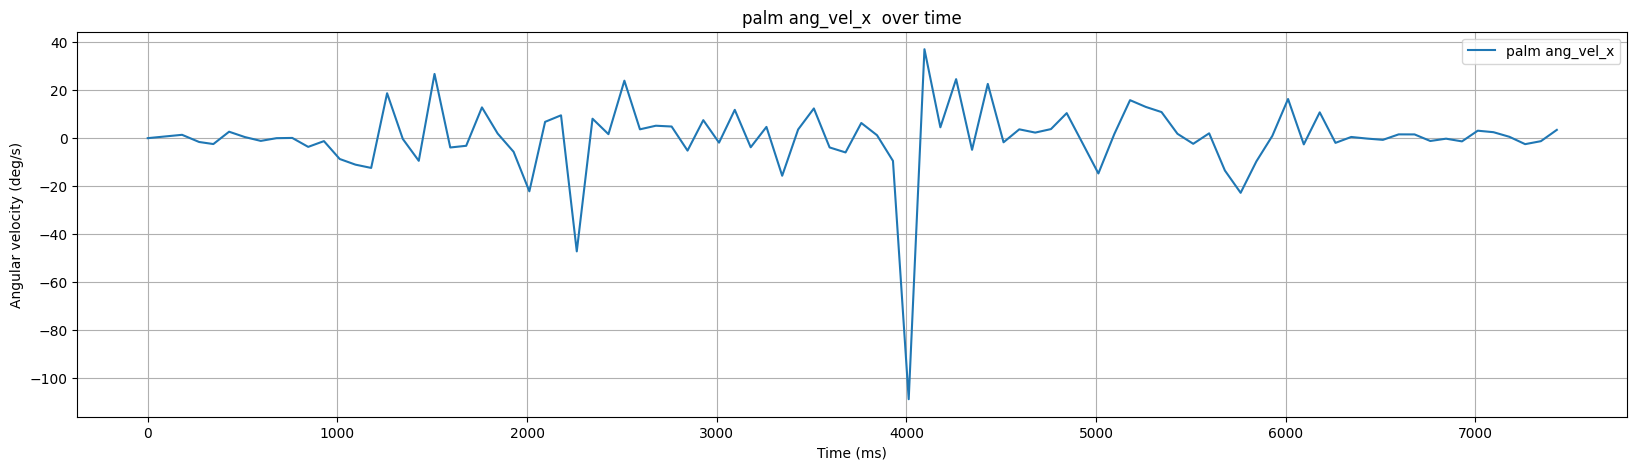

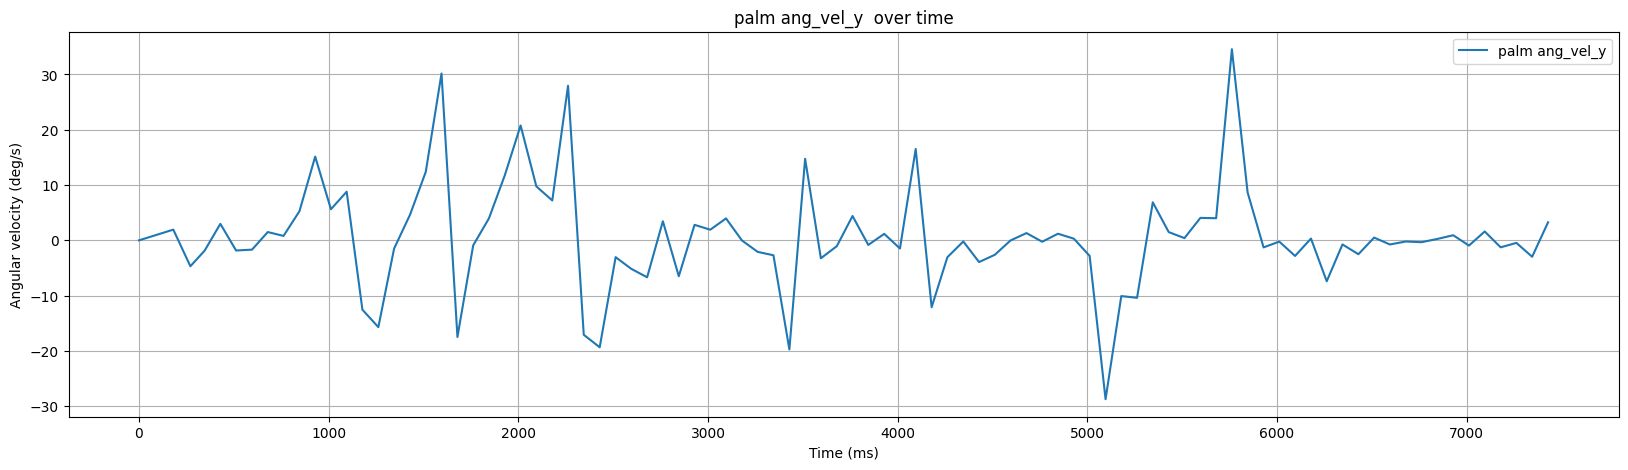

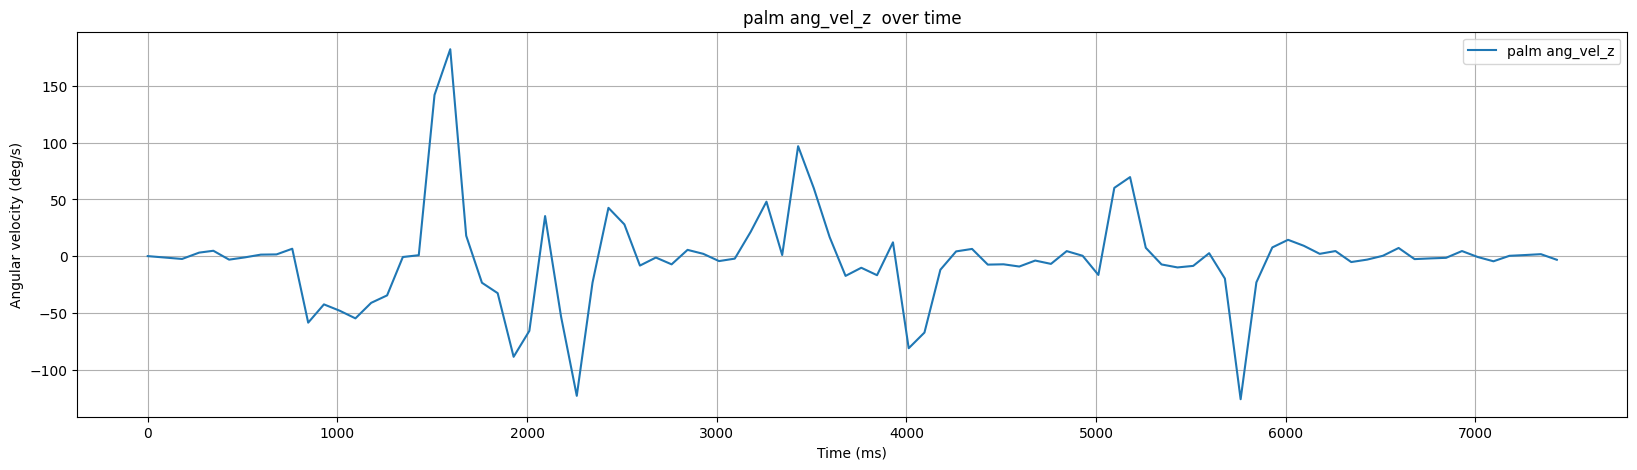

In [57]:
draw_ang_plot(palm_datas, "ang_vel_x", "palm", "Angular velocity (deg/s)", "")
draw_ang_plot(palm_datas, "ang_vel_y", "palm", "Angular velocity (deg/s)", "")
draw_ang_plot(palm_datas, "ang_vel_z", "palm", "Angular velocity (deg/s)", "")

## wrist angular velocities

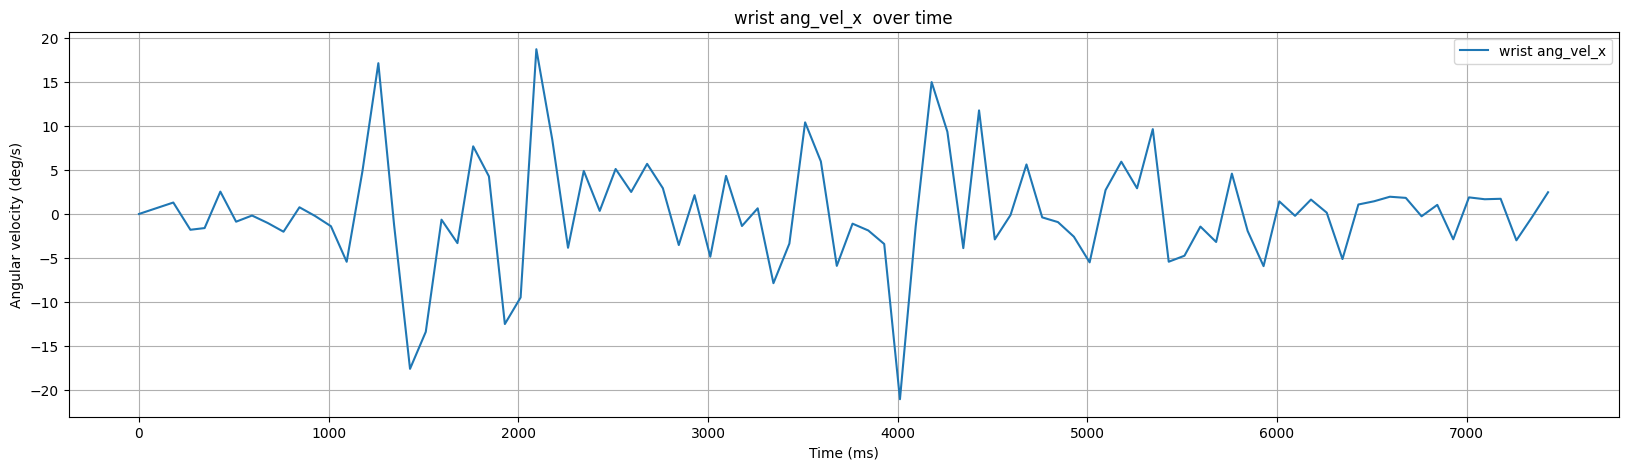

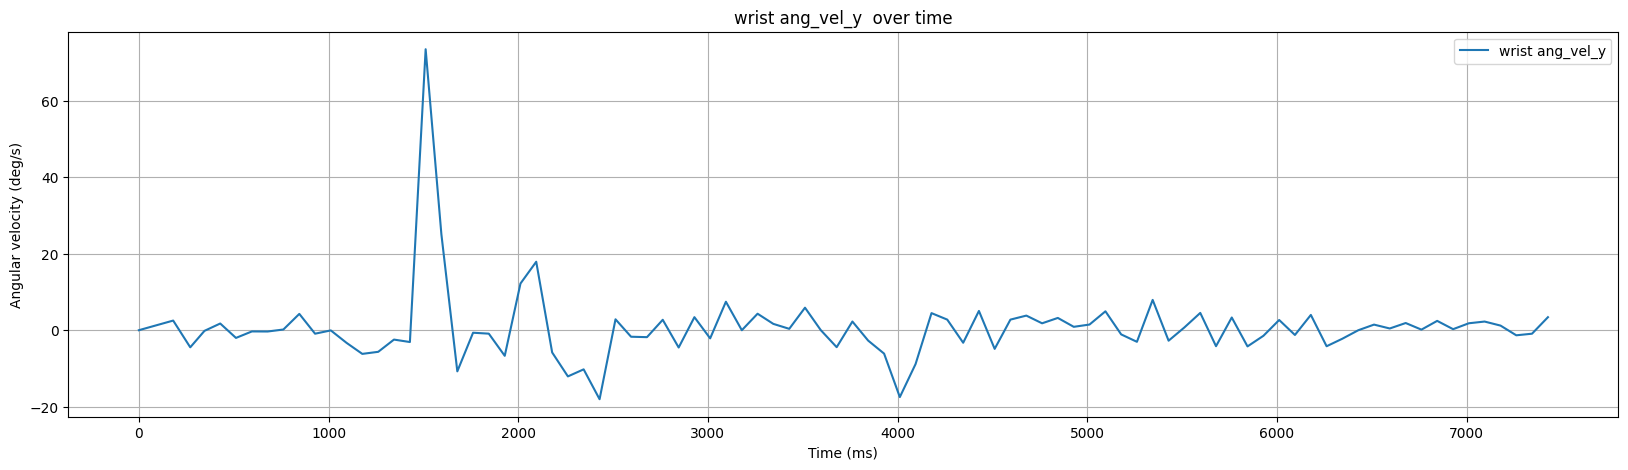

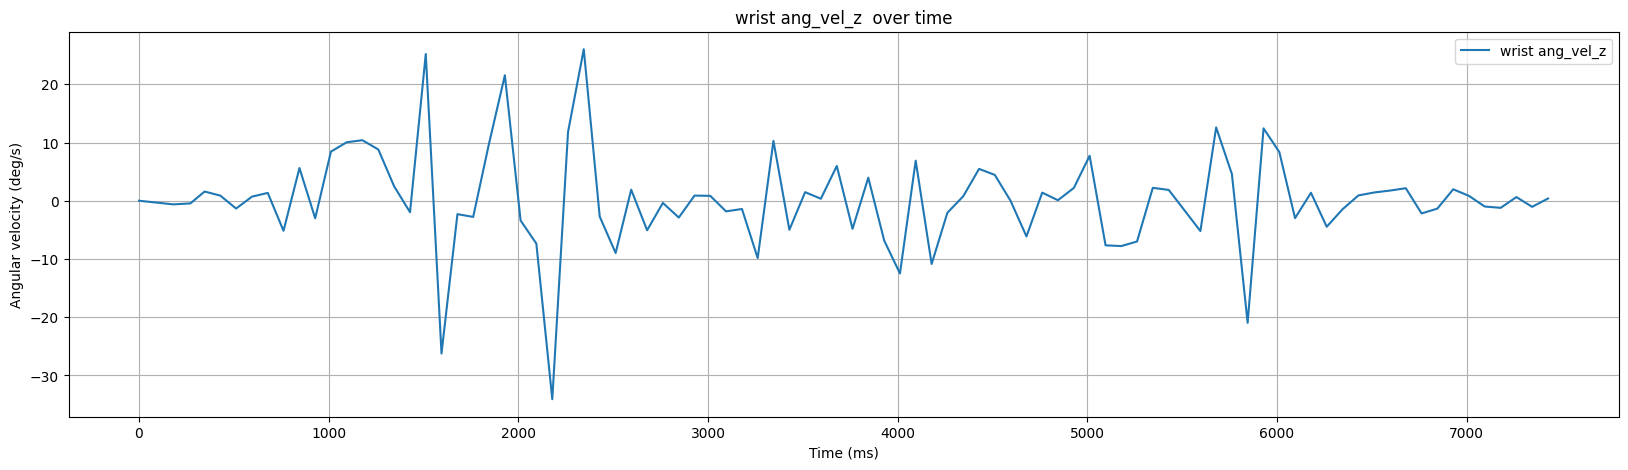

In [58]:
draw_ang_plot(wrist_datas, "ang_vel_x", "wrist", "Angular velocity (deg/s)", "")
draw_ang_plot(wrist_datas, "ang_vel_y", "wrist", "Angular velocity (deg/s)", "")
draw_ang_plot(wrist_datas, "ang_vel_z", "wrist", "Angular velocity (deg/s)", "")

## shoulder angular velocities

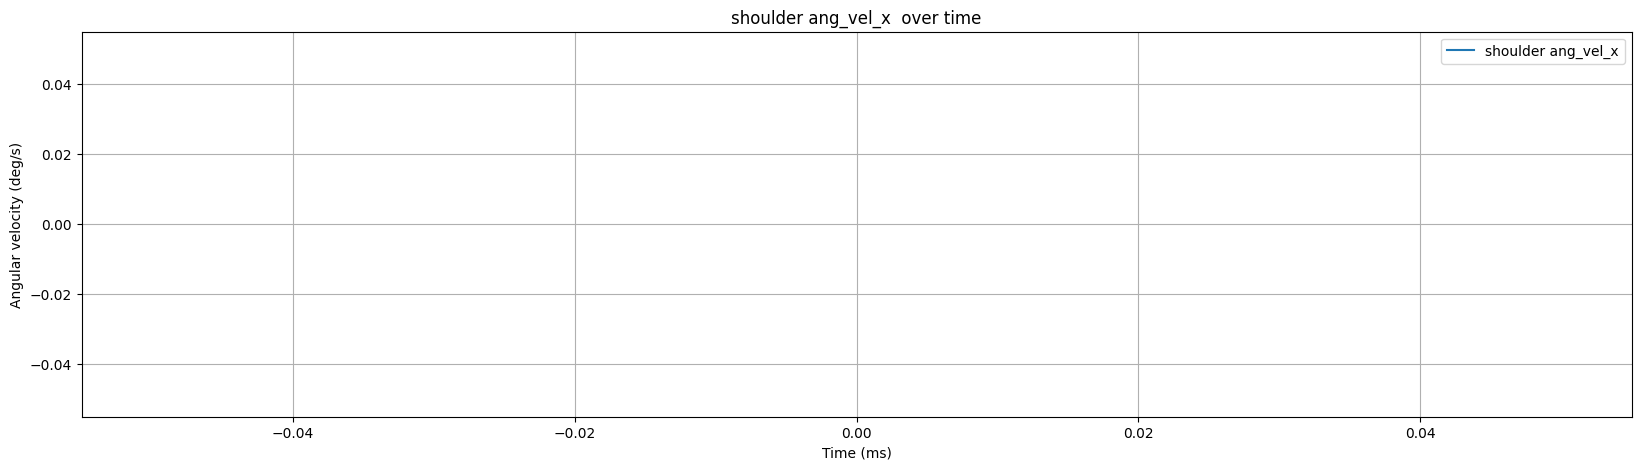

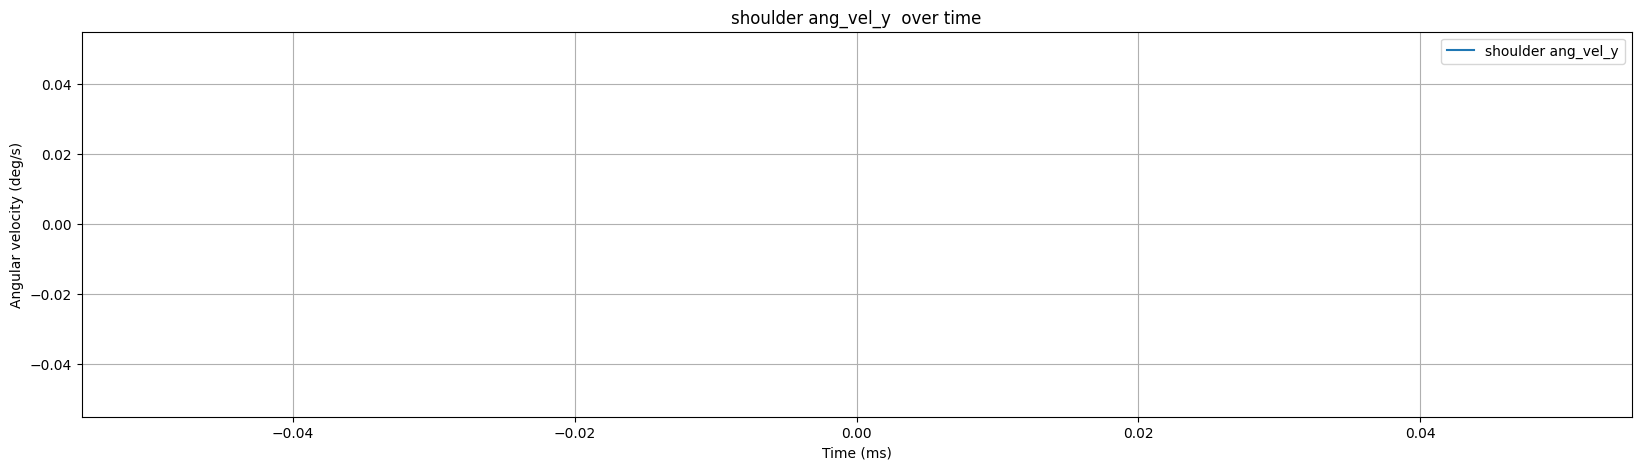

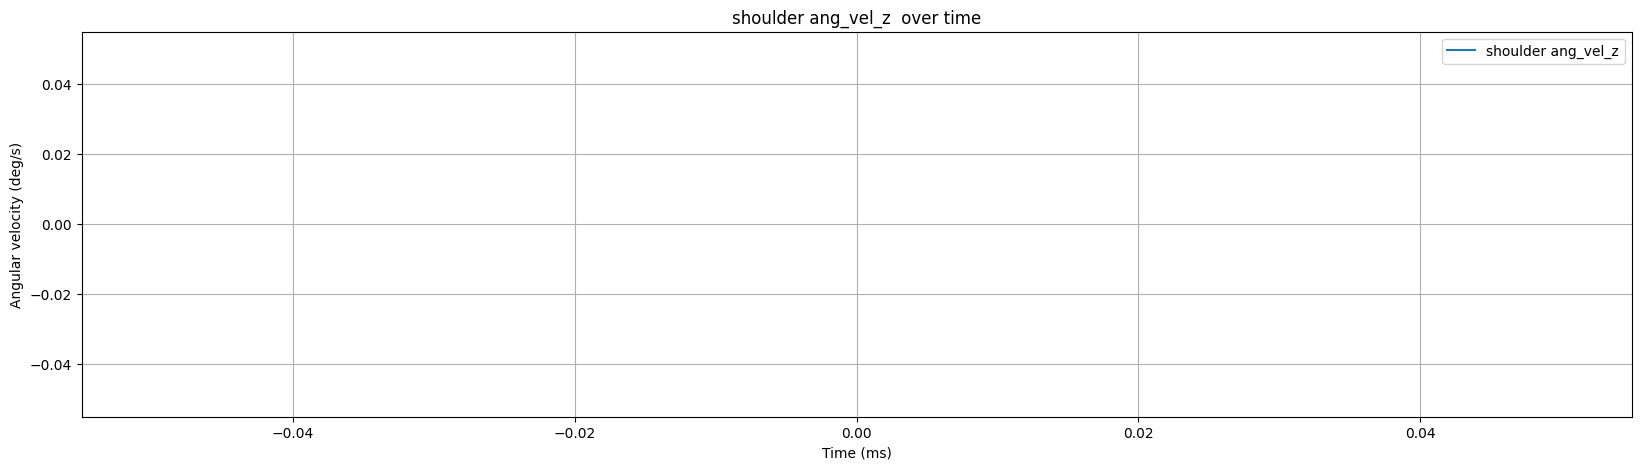

In [59]:
draw_ang_plot(shoulder_datas, "ang_vel_x", "shoulder", "Angular velocity (deg/s)", "")
draw_ang_plot(shoulder_datas, "ang_vel_y", "shoulder", "Angular velocity (deg/s)", "")
draw_ang_plot(shoulder_datas, "ang_vel_z", "shoulder", "Angular velocity (deg/s)", "")